In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

sns.set()



In [3]:
# Clean and Load Dataset

In [3]:
# Method to read file, process and divide dataset into X (Features) and y (label)

def read_process_divide(file):
    data = pd.read_csv(file)
    
    # drop first column
    data.drop(columns=data.columns[0], axis=1, inplace=True)
    
    # divide features and target
    X = data.iloc[:,: -1]
    y = data.iloc[:, -1]

    return data, X , y

In [4]:
diabetes_data, X, y = read_process_divide("Data/diabetes_data_jos_urban_2012_with_multiclass_diagnosis.csv")

In [5]:
# Exploratory Data Analysis

In [6]:
diabetes_data.head()

,Serial Number,Age,Gender,FPG (mg/dl),SBP (mmHg),DBP (mmHg),Weight (Kg),Height (m),H-SQRD,BMI,W.C (cm),H.C (cm),WHR,diagnosis,diagnosis_multiclass
0,1,41,M,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0,1
1,2,38,F,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0,0
2,3,35,M,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0,0
3,4,41,M,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0,0
4,5,52,M,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0,0


In [7]:
diabetes_data.tail()

,Serial Number,Age,Gender,FPG (mg/dl),SBP (mmHg),DBP (mmHg),Weight (Kg),Height (m),H-SQRD,BMI,W.C (cm),H.C (cm),WHR,diagnosis,diagnosis_multiclass
748,749,31,M,76,120.0,71.0,60,1.55,2.4025,25.0,82.0,97.0,0.85,0,0
749,750,45,F,182,135.0,75.0,85,1.61,2.5921,32.8,110.0,112.0,0.98,1,2
750,751,39,F,73,127.0,70.0,85,1.69,2.8561,29.8,107.0,112.0,0.96,0,0
751,752,47,M,427,129.0,70.0,78,1.68,2.8224,27.6,107.0,107.0,1.00,1,2
752,753,56,M,127,130.0,75.0,82,1.67,2.7889,29.4,89.0,93.0,0.96,1,2


In [8]:
# Rename Columns names

In [9]:
print(diabetes_data.columns)

Index(['Serial Number', 'Age', 'Gender', 'FPG (mg/dl)', 'SBP (mmHg)',
       'DBP (mmHg)', 'Weight (Kg)', 'Height (m)', 'H-SQRD', 'BMI', 'W.C (cm)',
       'H.C (cm)', 'WHR', 'diagnosis', 'diagnosis_multiclass'],
      dtype='object')


In [10]:
diabetes_data.columns = ['SN', 'Age','Gender','FPG', 'SBP', 'DBP','Weight', 'Height', 'H_sqrd','BMI','WC', 'HC', 'WHR', 'Diagnosis_binary','Diagnosis_multiclass']

In [11]:
print(diabetes_data.columns)

Index(['SN', 'Age', 'Gender', 'FPG', 'SBP', 'DBP', 'Weight', 'Height',
       'H_sqrd', 'BMI', 'WC', 'HC', 'WHR', 'Diagnosis_binary',
       'Diagnosis_multiclass'],
      dtype='object')


In [14]:
diabetes_data.head()

,SN,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_binary,Diagnosis_multiclass
0,1,41,M,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0,1
1,2,38,F,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0,0
2,3,35,M,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0,0
3,4,41,M,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0,0
4,5,52,M,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0,0


In [15]:
diabetes_data.shape

(753, 15)

In [16]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SN                    753 non-null    int64  
 1   Age                   753 non-null    int64  
 2   Gender                749 non-null    object 
 3   FPG                   753 non-null    int64  
 4   SBP                   752 non-null    float64
 5   DBP                   751 non-null    float64
 6   Weight                753 non-null    int64  
 7   Height                753 non-null    float64
 8   H_sqrd                753 non-null    float64
 9   BMI                   753 non-null    float64
 10  WC                    752 non-null    float64
 11  HC                    752 non-null    float64
 12  WHR                   752 non-null    float64
 13  Diagnosis_binary      753 non-null    int64  
 14  Diagnosis_multiclass  753 non-null    int64  
dtypes: float64(8), int64(6)

In [17]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SN,753.0,377.000000,217.516666,1.00,189.0000,377.0000,565.0000,753.0000
Age,753.0,45.717131,10.718146,10.00,39.0000,45.0000,52.0000,85.0000
FPG,753.0,109.917663,54.915977,59.00,86.0000,97.0000,113.0000,495.0000
SBP,752.0,136.571809,20.085109,89.00,123.0000,131.0000,146.0000,217.0000
DBP,751.0,84.070573,13.338529,26.00,74.0000,82.0000,92.0000,148.0000
Weight,753.0,74.362550,14.190105,28.00,65.0000,73.0000,83.0000,124.0000
Height,753.0,1.633267,0.089045,1.30,1.5800,1.6300,1.6900,1.9600
H_sqrd,753.0,2.675479,0.291055,1.69,2.4964,2.6569,2.8561,3.8416
BMI,753.0,27.936653,5.298149,14.90,24.1000,27.6000,31.1000,49.9000
WC,752.0,92.184840,13.596492,21.00,83.0000,92.0000,100.0000,156.0000


In [18]:
diabetes_data["Diagnosis_binary"].value_counts()

0    630
1    123
Name: Diagnosis_binary, dtype: int64

In [19]:
diabetes_data["Diagnosis_multiclass"].value_counts()

0    417
1    213
2    123
Name: Diagnosis_multiclass, dtype: int64

In [20]:
# Distribution of the binary and multiclass target variable

Text(0.5, 1.0, 'Distribution in target variable')

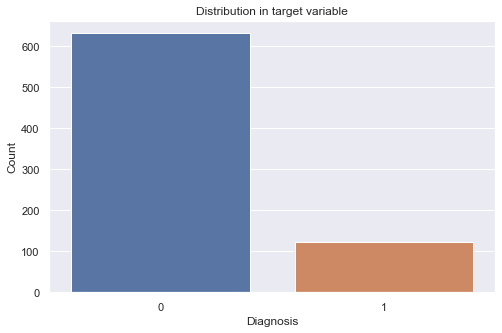

In [21]:
plt.figure(figsize = (8,5))
sns.countplot(x = diabetes_data["Diagnosis_binary"])
plt.xlabel('Diagnosis', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution in target variable', size = 12)

Text(0.5, 1.0, 'Distribution in target variable')

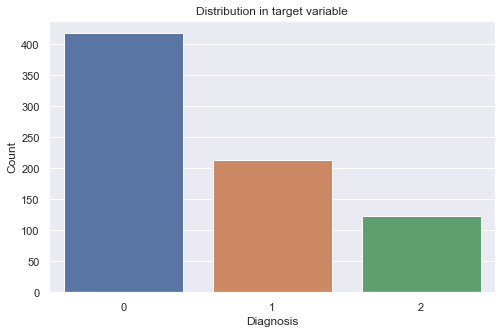

In [22]:
plt.figure(figsize = (8,5))
sns.countplot(x = diabetes_data["Diagnosis_multiclass"])
plt.xlabel('Diagnosis', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution in target variable', size = 12)

In [23]:
# Age and Glucose Verses the Binary Target Variable

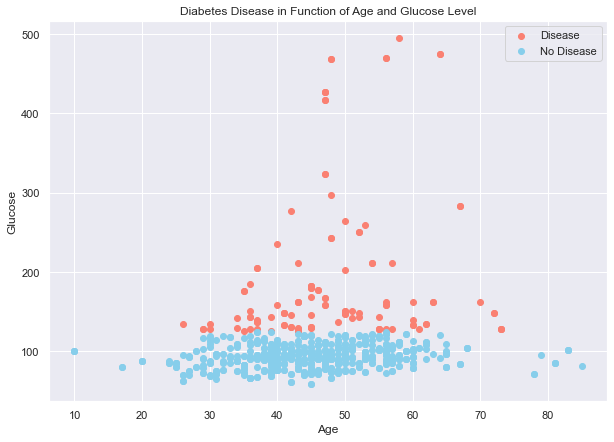

In [24]:
# Create another figure
plt.figure(figsize=(10,7))

# Start with positive examples
plt.scatter(diabetes_data.Age[diabetes_data.Diagnosis_binary==1],
            diabetes_data.FPG[diabetes_data.Diagnosis_binary==1],
            c = "salmon")

# Some Negative Examples
plt.scatter(diabetes_data.Age[diabetes_data.Diagnosis_binary == 0],
            diabetes_data.FPG[diabetes_data.Diagnosis_binary == 0],
            c = "skyblue")

# Add some other helpful information
plt.title("Diabetes Disease in Function of Age and Glucose Level")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend(["Disease", "No Disease"])

plt.show()

In [25]:
# Age and Glucose Verse Multiclass the Target  Variable

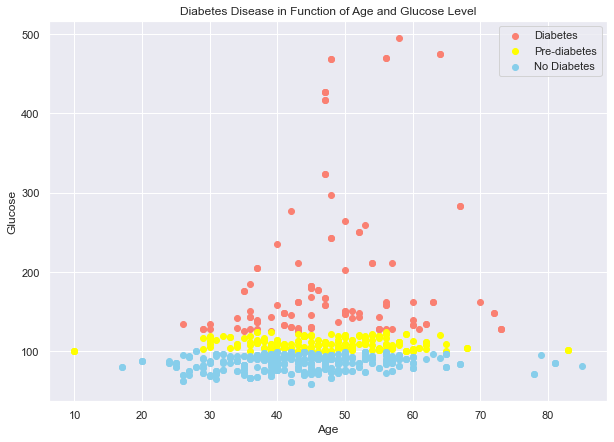

In [26]:
# Create another figure
plt.figure(figsize=(10,7))

# Start with positive diabetes examples
plt.scatter(diabetes_data.Age[diabetes_data.Diagnosis_multiclass==2],
            diabetes_data.FPG[diabetes_data.Diagnosis_multiclass==2],
            c = "salmon")


# positive pre-diabetes examples
plt.scatter(diabetes_data.Age[diabetes_data.Diagnosis_multiclass==1],
            diabetes_data.FPG[diabetes_data.Diagnosis_multiclass==1],
            c = "yellow")

# Some Negative Examples
plt.scatter(diabetes_data.Age[diabetes_data.Diagnosis_multiclass == 0],
            diabetes_data.FPG[diabetes_data.Diagnosis_multiclass == 0],
            c = "skyblue")

# Add some other helpful information
plt.title("Diabetes Disease in Function of Age and Glucose Level")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend(["Diabetes","Pre-diabetes", "No Diabetes"])

plt.show()

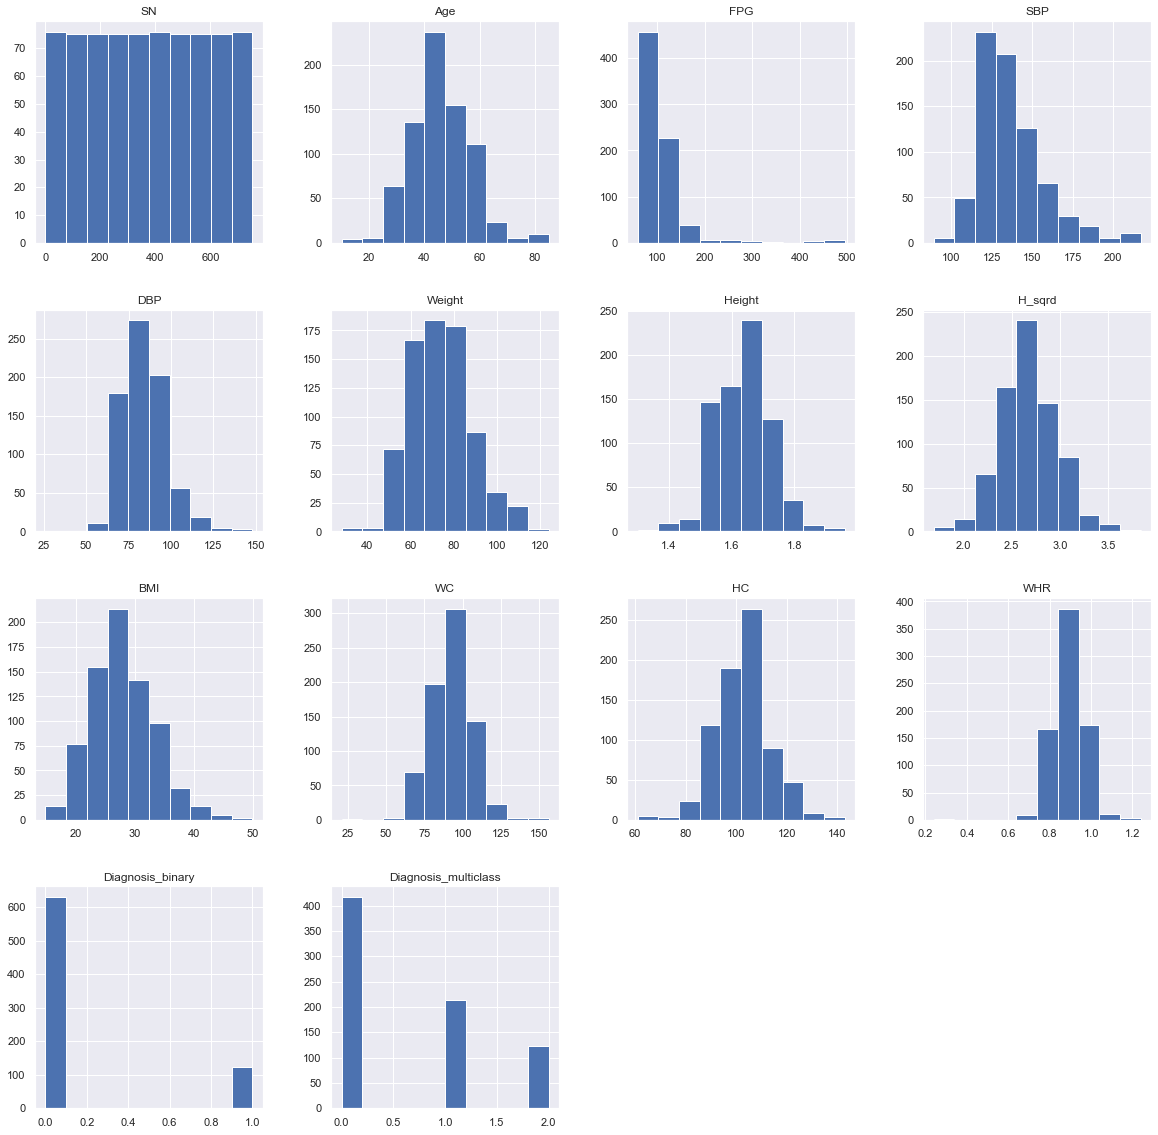

In [27]:
p = diabetes_data.hist(figsize = (20,20))

<AxesSubplot:>

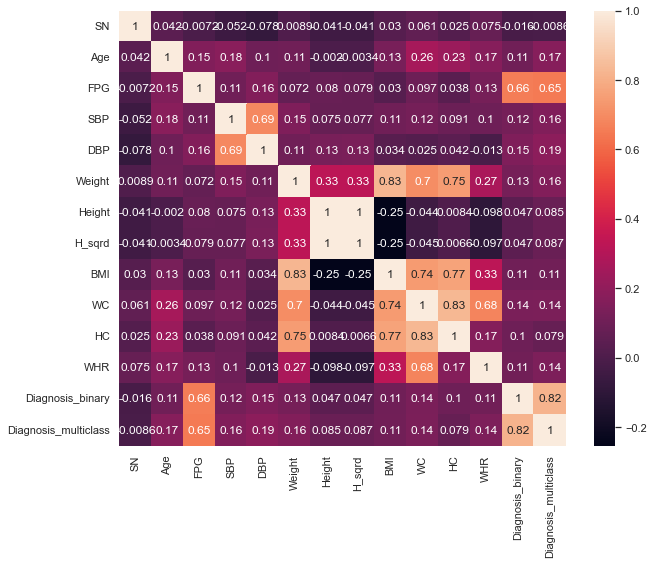

In [28]:
corr = diabetes_data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True)

<AxesSubplot:>

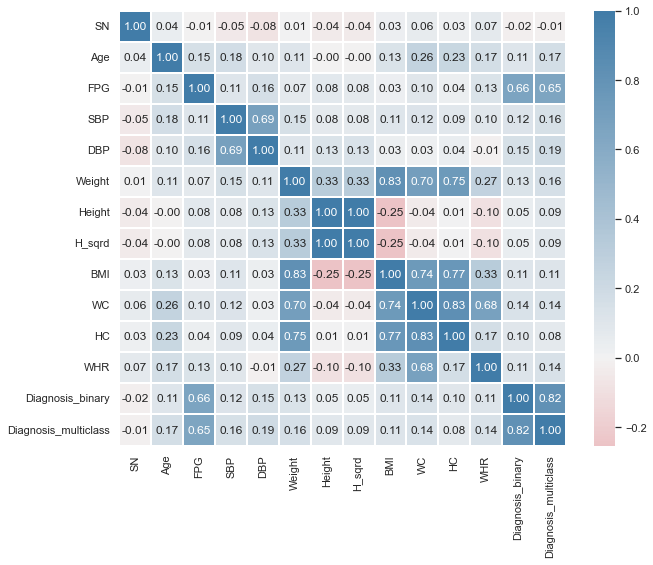

In [29]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
plt.figure(figsize = (10,8))
sns.heatmap(diabetes_data.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

<AxesSubplot:>

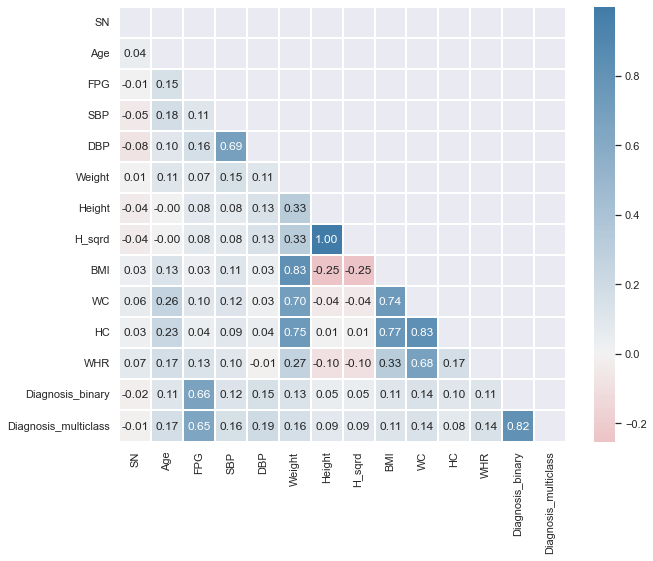

In [30]:
mask = np.triu(np.ones_like(diabetes_data.corr(), dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(diabetes_data.corr(), center=0, mask=mask, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

In [31]:
# Data Preprocessing phase 1

# Missing Data
# Dimentionality Reduction
# Scaling 
# Class Balancing

In [32]:
# Clean Diabetes Data

In [33]:
diabetes_data["Gender"].value_counts()

F     392
M     348
f       6
 M      3
Name: Gender, dtype: int64

In [34]:
diabetes_data["Gender"]= diabetes_data["Gender"].str.strip(' ')

In [35]:
diabetes_data["Gender"]= diabetes_data["Gender"].str.upper()

In [36]:
diabetes_data["Gender"].value_counts()

F    398
M    351
Name: Gender, dtype: int64

In [37]:
# Change datatype to categorical

In [38]:
diabetes_data["Gender"]= diabetes_data["Gender"].astype("category")

In [39]:
diabetes_data.Gender.describe()

count     749
unique      2
top         F
freq      398
Name: Gender, dtype: object

In [40]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   SN                    753 non-null    int64   
 1   Age                   753 non-null    int64   
 2   Gender                749 non-null    category
 3   FPG                   753 non-null    int64   
 4   SBP                   752 non-null    float64 
 5   DBP                   751 non-null    float64 
 6   Weight                753 non-null    int64   
 7   Height                753 non-null    float64 
 8   H_sqrd                753 non-null    float64 
 9   BMI                   753 non-null    float64 
 10  WC                    752 non-null    float64 
 11  HC                    752 non-null    float64 
 12  WHR                   752 non-null    float64 
 13  Diagnosis_binary      753 non-null    int64   
 14  Diagnosis_multiclass  753 non-null    int64   
dtypes: cat

In [41]:
diabetes_data.isna().sum()

SN                      0
Age                     0
Gender                  4
FPG                     0
SBP                     1
DBP                     2
Weight                  0
Height                  0
H_sqrd                  0
BMI                     0
WC                      1
HC                      1
WHR                     1
Diagnosis_binary        0
Diagnosis_multiclass    0
dtype: int64

In [90]:
diabetes_data.Diagnosis_binary = diabetes_data.Diagnosis_binary.astype("category")

In [91]:
diabetes_data.Diagnosis_multiclass = diabetes_data.Diagnosis_multiclass.astype("category")

In [93]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   SN                    753 non-null    int64   
 1   Age                   753 non-null    int64   
 2   Gender                749 non-null    category
 3   FPG                   753 non-null    int64   
 4   SBP                   752 non-null    float64 
 5   DBP                   751 non-null    float64 
 6   Weight                753 non-null    int64   
 7   Height                753 non-null    float64 
 8   H_sqrd                753 non-null    float64 
 9   BMI                   753 non-null    float64 
 10  WC                    752 non-null    float64 
 11  HC                    752 non-null    float64 
 12  WHR                   752 non-null    float64 
 13  Diagnosis_binary      753 non-null    category
 14  Diagnosis_multiclass  753 non-null    category
dtypes: cat

In [92]:
diabetes_data.describe(exclude="number")

,Gender,Diagnosis_binary,Diagnosis_multiclass
count,749,753,753
unique,2,2,3
top,F,0,0
freq,398,630,417


In [94]:
diabetes_data.isna().sum() / len(diabetes_data)

SN                      0.000000
Age                     0.000000
Gender                  0.005312
FPG                     0.000000
SBP                     0.001328
DBP                     0.002656
Weight                  0.000000
Height                  0.000000
H_sqrd                  0.000000
BMI                     0.000000
WC                      0.001328
HC                      0.001328
WHR                     0.001328
Diagnosis_binary        0.000000
Diagnosis_multiclass    0.000000
dtype: float64

In [42]:
# Drop all rows with missing values

In [43]:
diabetes_data_reduced = diabetes_data.dropna(axis=0, how ='any')
diabetes_data_reduced.shape

(746, 15)

In [44]:
diabetes_data.shape

(753, 15)

In [45]:
diabetes_data_reduced.isna().sum()

SN                      0
Age                     0
Gender                  0
FPG                     0
SBP                     0
DBP                     0
Weight                  0
Height                  0
H_sqrd                  0
BMI                     0
WC                      0
HC                      0
WHR                     0
Diagnosis_binary        0
Diagnosis_multiclass    0
dtype: int64

In [48]:
diabetes_data_reduced.head()

,SN,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_binary,Diagnosis_multiclass
0,1,41,M,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0,1
1,2,38,F,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0,0
2,3,35,M,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0,0
3,4,41,M,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0,0
4,5,52,M,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0,0


In [84]:
data_copy = diabetes_data_reduced.copy()

In [85]:
data_copy = data_copy.drop(["SN", "Diagnosis_binary" ], axis=1)

In [86]:
data_copy

,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_multiclass
0,41,M,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,1
1,38,F,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0
2,35,M,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0
3,41,M,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0
4,52,M,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,31,M,76,120.0,71.0,60,1.55,2.4025,25.0,82.0,97.0,0.85,0
749,45,F,182,135.0,75.0,85,1.61,2.5921,32.8,110.0,112.0,0.98,2
750,39,F,73,127.0,70.0,85,1.69,2.8561,29.8,107.0,112.0,0.96,0
751,47,M,427,129.0,70.0,78,1.68,2.8224,27.6,107.0,107.0,1.00,2


In [87]:
# Convert Categorical variable to numerical

In [88]:
numeric = pd.get_dummies(data_copy["Gender"], prefix_sep='_', prefix="Gender")

In [89]:
# Merge nummeric gender data to data_copy

In [90]:
data_copy = pd.concat([data_copy, numeric], axis=1)
data_copy.drop("Gender", axis=1, inplace=True)
data_copy.head()

,Age,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_multiclass,Gender_F,Gender_M
0,41,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,1,0,1
1,38,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0,1,0
2,35,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0,0,1
3,41,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0,0,1
4,52,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0,0,1


In [91]:
data_copy.shape

(746, 14)

In [92]:
# Change the order of the dataset

In [93]:
data_copy.columns

Index(['Age', 'FPG', 'SBP', 'DBP', 'Weight', 'Height', 'H_sqrd', 'BMI', 'WC',
       'HC', 'WHR', 'Diagnosis_multiclass', 'Gender_F', 'Gender_M'],
      dtype='object')

In [94]:
data_copy = data_copy.loc[:,['Age','Gender_F', 'Gender_M', 'FPG', 'SBP', 'DBP', 'Weight', 'Height', 'H_sqrd', 'BMI', 'WC',
       'HC', 'WHR', 'Diagnosis_multiclass' ]]

In [99]:
# Save Cleaned Data with no missing values

In [98]:
diabetes_data_reduced.to_csv("Data/diabetes_data_jos_urban_2012_no_missing_values.csv")

In [46]:
diabetes_data_reduced.to_csv("Data/diabetes_data_jos_urban_2012_no_missing_values_target_integer.csv")

In [ ]:
# Save cleaned data with gender converted from categorical to numerical

In [95]:
data_copy.to_csv("Data/diabetes_data_jos_urban_2012_no_missing_values_multiclass_target.csv")

In [82]:
data_copy.to_csv("Data/diabetes_data_jos_urban_2012_no_missing_values_binary_target.csv")

In [ ]:
# Exploratory Data Analysis 2

In [4]:
diabetes_data, X, y = read_process_divide("Diabetes data/diabetes_data_jos.csv")

In [5]:
# Exploratory Data Analysis

In [6]:
diabetes_data.head()

,Serial Number,Age,Gender,FPG (mg/dl),SBP (mmHg),DBP (mmHg),Weight (Kg),Height (m),H-SQRD,BMI,W.C (cm),H.C (cm),WHR,diagnosis
0,1,41,M,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0
1,2,38,F,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0
2,3,35,M,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0
3,4,41,M,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0
4,5,52,M,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0


In [7]:
diabetes_data.tail()

,Serial Number,Age,Gender,FPG (mg/dl),SBP (mmHg),DBP (mmHg),Weight (Kg),Height (m),H-SQRD,BMI,W.C (cm),H.C (cm),WHR,diagnosis
748,749,31,M,76,120.0,71.0,60,1.55,2.4025,25.0,82.0,97.0,0.85,0
749,750,45,F,182,135.0,75.0,85,1.61,2.5921,32.8,110.0,112.0,0.98,1
750,751,39,F,73,127.0,70.0,85,1.69,2.8561,29.8,107.0,112.0,0.96,0
751,752,47,M,427,129.0,70.0,78,1.68,2.8224,27.6,107.0,107.0,1.00,1
752,753,56,M,127,130.0,75.0,82,1.67,2.7889,29.4,89.0,93.0,0.96,1


In [8]:
# Rename Columns names

In [9]:
print(diabetes_data.columns)

Index(['Serial Number', 'Age', 'Gender', 'FPG (mg/dl)', 'SBP (mmHg)',
       'DBP (mmHg)', 'Weight (Kg)', 'Height (m)', 'H-SQRD', 'BMI', 'W.C (cm)',
       'H.C (cm)', 'WHR', 'diagnosis'],
      dtype='object')


In [10]:
diabetes_data.columns = ['SN', 'Age','Gender','FPG', 'SBP', 'DBP','Weight', 'Height', 'H_sqrd','BMI','WC', 'HC', 'WHR', 'Diagnosis_binary']

In [11]:
print(diabetes_data.columns)

Index(['SN', 'Age', 'Gender', 'FPG', 'SBP', 'DBP', 'Weight', 'Height',
       'H_sqrd', 'BMI', 'WC', 'HC', 'WHR', 'Diagnosis_binary'],
      dtype='object')


In [12]:
diabetes_data.head()

,SN,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_binary
0,1,41,M,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0
1,2,38,F,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0
2,3,35,M,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0
3,4,41,M,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0
4,5,52,M,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0


In [13]:
diabetes_data.shape

(753, 14)

In [14]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SN                753 non-null    int64  
 1   Age               753 non-null    int64  
 2   Gender            749 non-null    object 
 3   FPG               753 non-null    int64  
 4   SBP               752 non-null    float64
 5   DBP               751 non-null    float64
 6   Weight            753 non-null    int64  
 7   Height            753 non-null    float64
 8   H_sqrd            753 non-null    float64
 9   BMI               753 non-null    float64
 10  WC                752 non-null    float64
 11  HC                752 non-null    float64
 12  WHR               753 non-null    object 
 13  Diagnosis_binary  753 non-null    int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 82.5+ KB


In [15]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SN,753.0,377.000000,217.516666,1.00,189.0000,377.0000,565.0000,753.0000
Age,753.0,45.717131,10.718146,10.00,39.0000,45.0000,52.0000,85.0000
FPG,753.0,109.917663,54.915977,59.00,86.0000,97.0000,113.0000,495.0000
SBP,752.0,136.571809,20.085109,89.00,123.0000,131.0000,146.0000,217.0000
DBP,751.0,84.070573,13.338529,26.00,74.0000,82.0000,92.0000,148.0000
Weight,753.0,74.362550,14.190105,28.00,65.0000,73.0000,83.0000,124.0000
Height,753.0,1.633267,0.089045,1.30,1.5800,1.6300,1.6900,1.9600
H_sqrd,753.0,2.675479,0.291055,1.69,2.4964,2.6569,2.8561,3.8416
BMI,753.0,27.936653,5.298149,14.90,24.1000,27.6000,31.1000,49.9000
WC,752.0,92.184840,13.596492,21.00,83.0000,92.0000,100.0000,156.0000


In [16]:
diabetes_data["Diagnosis_binary"].value_counts()

0    501
1    252
Name: Diagnosis_binary, dtype: int64

In [17]:
# Distribution of the binary target variable

Text(0.5, 1.0, 'Distribution in target variable')

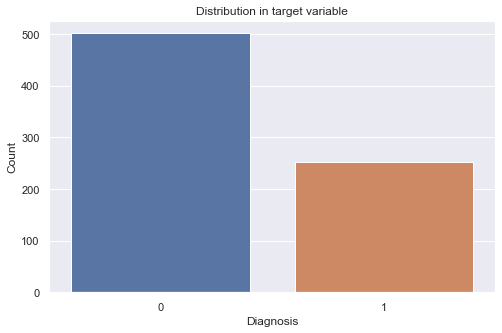

In [18]:
plt.figure(figsize = (8,5))
sns.countplot(x = diabetes_data["Diagnosis_binary"])
plt.xlabel('Diagnosis', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution in target variable', size = 12)

In [19]:
# Age and Glucose Verses the Binary Target Variable

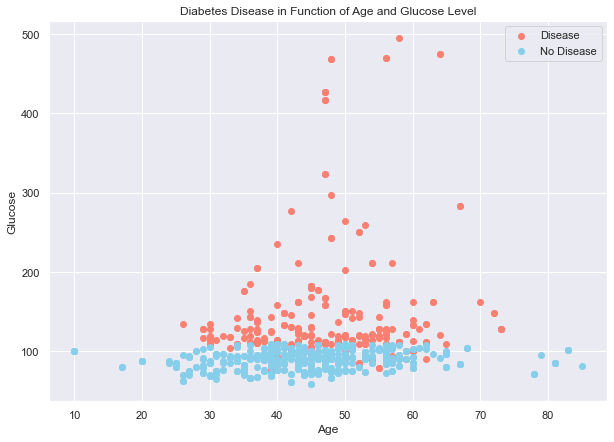

In [20]:
# Create another figure
plt.figure(figsize=(10,7))

# Start with positive examples
plt.scatter(diabetes_data.Age[diabetes_data.Diagnosis_binary==1],
            diabetes_data.FPG[diabetes_data.Diagnosis_binary==1],
            c = "salmon")

# Some Negative Examples
plt.scatter(diabetes_data.Age[diabetes_data.Diagnosis_binary == 0],
            diabetes_data.FPG[diabetes_data.Diagnosis_binary == 0],
            c = "skyblue")

# Add some other helpful information
plt.title("Diabetes Disease in Function of Age and Glucose Level")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend(["Disease", "No Disease"])

plt.show()

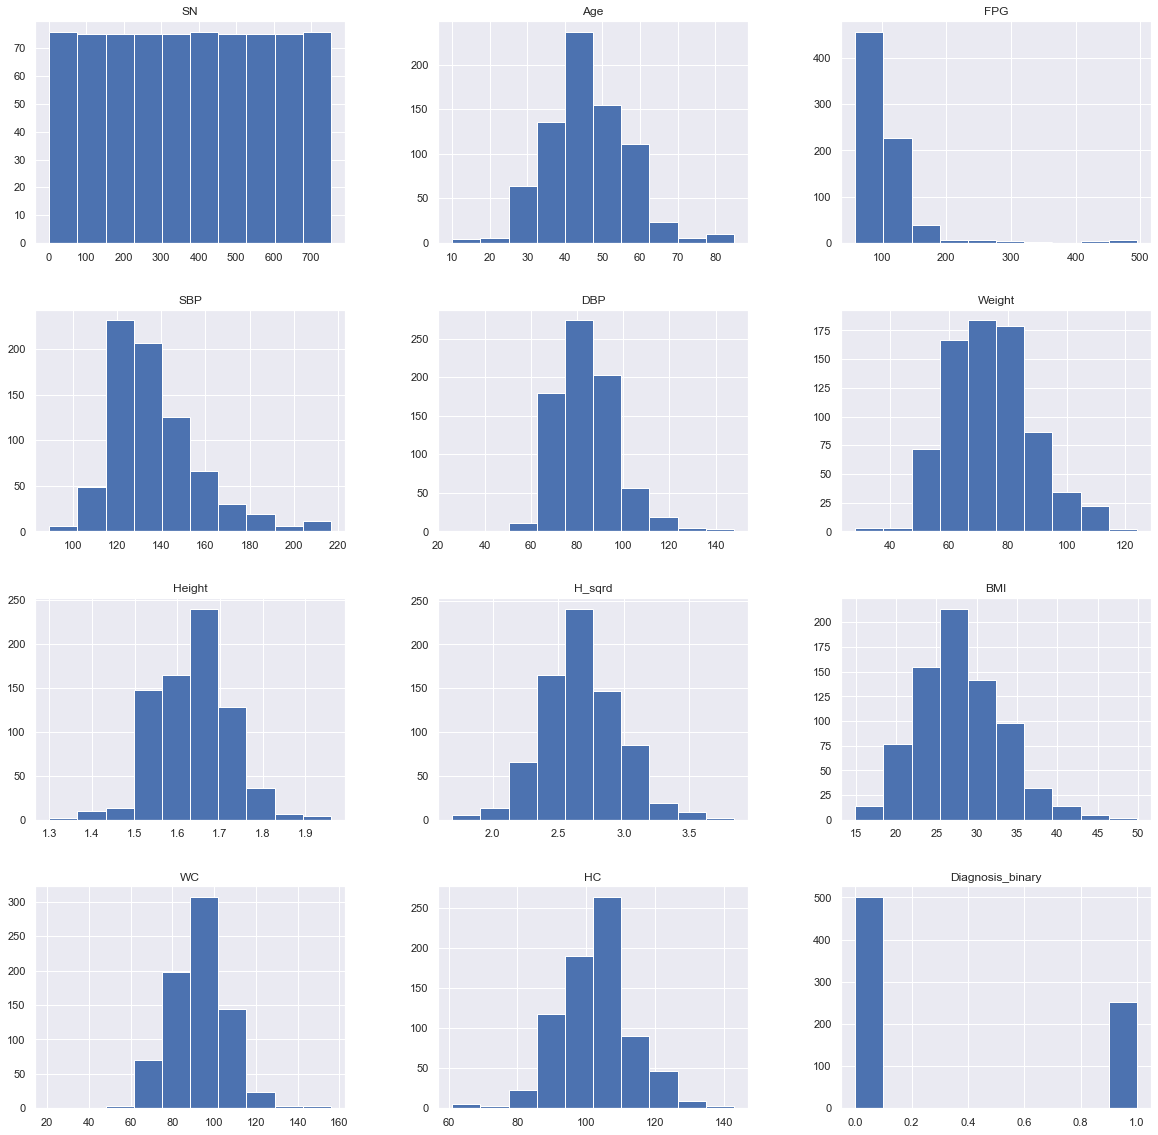

In [22]:
p = diabetes_data.hist(figsize = (20,20))

<AxesSubplot:>

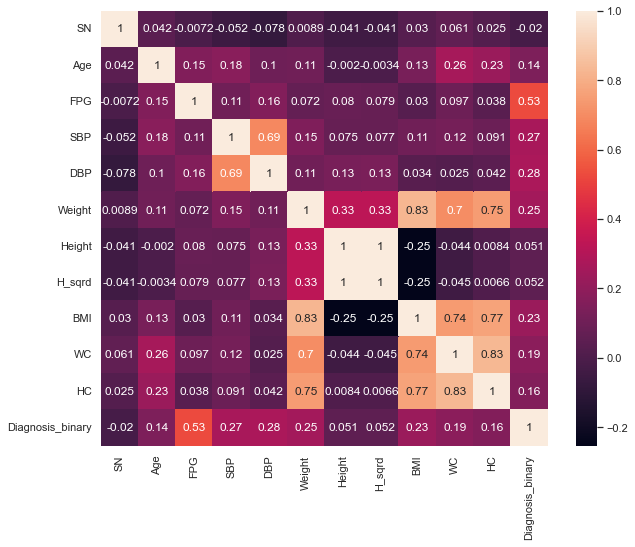

In [23]:
corr = diabetes_data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True)

<AxesSubplot:>

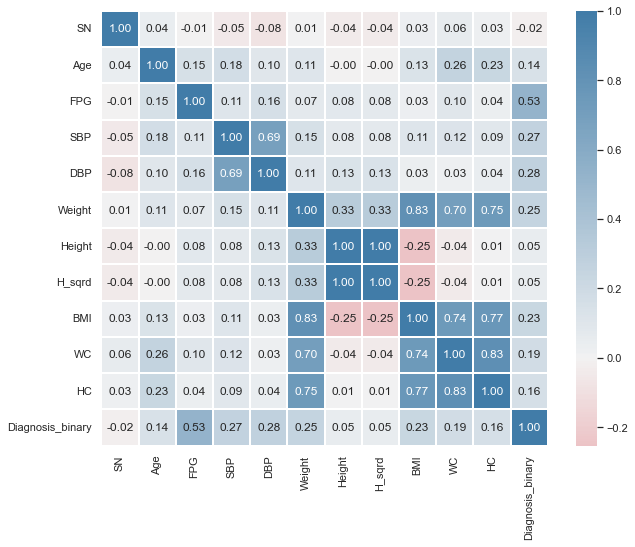

In [25]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
plt.figure(figsize = (10,8))
sns.heatmap(diabetes_data.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

<AxesSubplot:>

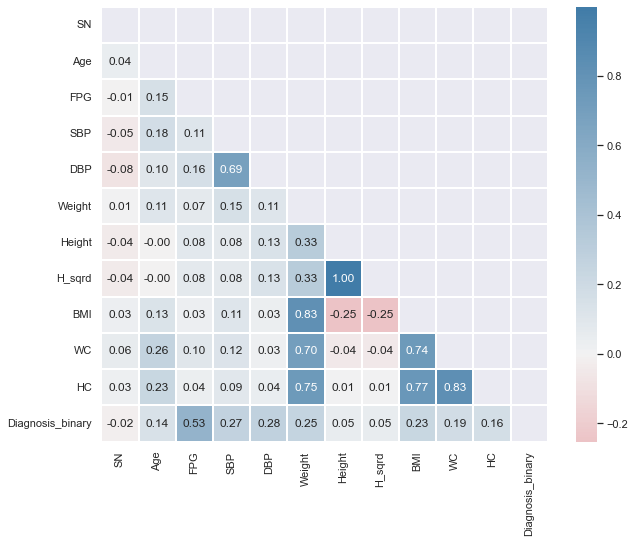

In [26]:
mask = np.triu(np.ones_like(diabetes_data.corr(), dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(diabetes_data.corr(), center=0, mask=mask, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

In [27]:
# Data Preprocessing phase 1

# Missing Data
# Dimentionality Reduction
# Scaling 
# Class Balancing

In [28]:
# Clean Diabetes Data

In [29]:
diabetes_data["Gender"].value_counts()

F     392
M     348
f       6
 M      3
Name: Gender, dtype: int64

In [30]:
diabetes_data["Gender"]= diabetes_data["Gender"].str.strip(' ')

In [31]:
diabetes_data["Gender"]= diabetes_data["Gender"].str.upper()

In [32]:
diabetes_data["Gender"].value_counts()

F    398
M    351
Name: Gender, dtype: int64

In [37]:
# Change datatype to categorical

In [38]:
diabetes_data["Gender"]= diabetes_data["Gender"].astype("category")

In [33]:
diabetes_data.Gender.describe()

count     749
unique      2
top         F
freq      398
Name: Gender, dtype: object

In [34]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SN                753 non-null    int64  
 1   Age               753 non-null    int64  
 2   Gender            749 non-null    object 
 3   FPG               753 non-null    int64  
 4   SBP               752 non-null    float64
 5   DBP               751 non-null    float64
 6   Weight            753 non-null    int64  
 7   Height            753 non-null    float64
 8   H_sqrd            753 non-null    float64
 9   BMI               753 non-null    float64
 10  WC                752 non-null    float64
 11  HC                752 non-null    float64
 12  WHR               753 non-null    object 
 13  Diagnosis_binary  753 non-null    int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 82.5+ KB


In [35]:
diabetes_data.isna().sum()

SN                  0
Age                 0
Gender              4
FPG                 0
SBP                 1
DBP                 2
Weight              0
Height              0
H_sqrd              0
BMI                 0
WC                  1
HC                  1
WHR                 0
Diagnosis_binary    0
dtype: int64

In [90]:
#diabetes_data.Diagnosis_binary = diabetes_data.Diagnosis_binary.astype("category")

In [91]:
#diabetes_data.Diagnosis_multiclass = diabetes_data.Diagnosis_multiclass.astype("category")

In [93]:
#diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   SN                    753 non-null    int64   
 1   Age                   753 non-null    int64   
 2   Gender                749 non-null    category
 3   FPG                   753 non-null    int64   
 4   SBP                   752 non-null    float64 
 5   DBP                   751 non-null    float64 
 6   Weight                753 non-null    int64   
 7   Height                753 non-null    float64 
 8   H_sqrd                753 non-null    float64 
 9   BMI                   753 non-null    float64 
 10  WC                    752 non-null    float64 
 11  HC                    752 non-null    float64 
 12  WHR                   752 non-null    float64 
 13  Diagnosis_binary      753 non-null    category
 14  Diagnosis_multiclass  753 non-null    category
dtypes: cat

In [36]:
diabetes_data.describe(exclude="number")

,Gender,WHR
count,749,753
unique,2,39
top,F,0.89
freq,398,56


In [37]:
diabetes_data.isna().sum() / len(diabetes_data)

SN                  0.000000
Age                 0.000000
Gender              0.005312
FPG                 0.000000
SBP                 0.001328
DBP                 0.002656
Weight              0.000000
Height              0.000000
H_sqrd              0.000000
BMI                 0.000000
WC                  0.001328
HC                  0.001328
WHR                 0.000000
Diagnosis_binary    0.000000
dtype: float64

In [38]:
# Drop all rows with missing values

In [39]:
diabetes_data_reduced = diabetes_data.dropna(axis=0, how ='any')
diabetes_data_reduced.shape

(746, 14)

In [40]:
diabetes_data.shape

(753, 14)

In [41]:
diabetes_data_reduced.isna().sum()

SN                  0
Age                 0
Gender              0
FPG                 0
SBP                 0
DBP                 0
Weight              0
Height              0
H_sqrd              0
BMI                 0
WC                  0
HC                  0
WHR                 0
Diagnosis_binary    0
dtype: int64

In [42]:
diabetes_data_reduced.head()

,SN,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_binary
0,1,41,M,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0
1,2,38,F,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0
2,3,35,M,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0
3,4,41,M,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0
4,5,52,M,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0


In [46]:
diabetes_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 752
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SN                746 non-null    int64  
 1   Age               746 non-null    int64  
 2   Gender            746 non-null    object 
 3   FPG               746 non-null    int64  
 4   SBP               746 non-null    float64
 5   DBP               746 non-null    float64
 6   Weight            746 non-null    int64  
 7   Height            746 non-null    float64
 8   H_sqrd            746 non-null    float64
 9   BMI               746 non-null    float64
 10  WC                746 non-null    float64
 11  HC                746 non-null    float64
 12  WHR               746 non-null    object 
 13  Diagnosis_binary  746 non-null    int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 87.4+ KB


In [43]:
data_copy = diabetes_data_reduced.copy()

In [44]:
data_copy = data_copy.drop(["SN"], axis=1)

In [48]:
data_copy

,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_binary
0,41,M,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0
1,38,F,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0
2,35,M,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0
3,41,M,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0
4,52,M,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,31,M,76,120.0,71.0,60,1.55,2.4025,25.0,82.0,97.0,0.85,0
749,45,F,182,135.0,75.0,85,1.61,2.5921,32.8,110.0,112.0,0.98,1
750,39,F,73,127.0,70.0,85,1.69,2.8561,29.8,107.0,112.0,0.96,0
751,47,M,427,129.0,70.0,78,1.68,2.8224,27.6,107.0,107.0,1.00,1


In [49]:
# Convert Categorical variable to numerical

In [50]:
numeric = pd.get_dummies(data_copy["Gender"], prefix_sep='_', prefix="Gender")

In [51]:
# Merge nummeric gender data to data_copy

In [52]:
data_copy = pd.concat([data_copy, numeric], axis=1)
data_copy.drop("Gender", axis=1, inplace=True)
data_copy.head()

,Age,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_binary,Gender_F,Gender_M
0,41,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0,0,1
1,38,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0,1,0
2,35,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0,0,1
3,41,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0,0,1
4,52,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0,0,1


In [53]:
data_copy.shape

(746, 14)

In [54]:
# Change the order of the dataset

In [55]:
data_copy.columns

Index(['Age', 'FPG', 'SBP', 'DBP', 'Weight', 'Height', 'H_sqrd', 'BMI', 'WC',
       'HC', 'WHR', 'Diagnosis_binary', 'Gender_F', 'Gender_M'],
      dtype='object')

In [57]:
data_copy = data_copy.loc[:,['Age','Gender_F', 'Gender_M', 'FPG', 'SBP', 'DBP', 'Weight', 'Height', 'H_sqrd', 'BMI', 'WC',
       'HC', 'WHR', 'Diagnosis_binary' ]]

In [58]:
data_copy.head()

,Age,Gender_F,Gender_M,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_binary
0,41,0,1,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0
1,38,1,0,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0
2,35,0,1,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0
3,41,0,1,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0
4,52,0,1,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0


In [59]:
data_copy['WHR'] = data_copy['WHR'].astype("float")

In [60]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 752
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               746 non-null    int64  
 1   Gender_F          746 non-null    uint8  
 2   Gender_M          746 non-null    uint8  
 3   FPG               746 non-null    int64  
 4   SBP               746 non-null    float64
 5   DBP               746 non-null    float64
 6   Weight            746 non-null    int64  
 7   Height            746 non-null    float64
 8   H_sqrd            746 non-null    float64
 9   BMI               746 non-null    float64
 10  WC                746 non-null    float64
 11  HC                746 non-null    float64
 12  WHR               746 non-null    float64
 13  Diagnosis_binary  746 non-null    int64  
dtypes: float64(8), int64(4), uint8(2)
memory usage: 77.2 KB


<AxesSubplot:>

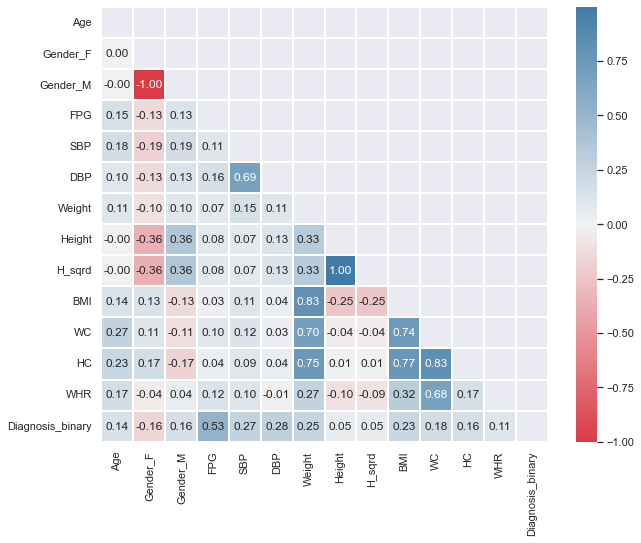

In [61]:
# See complete correlation of all variables
mask = np.triu(np.ones_like(data_copy.corr(), dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(data_copy.corr(), center=0, mask=mask, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

In [99]:
# Save Cleaned Data with no missing values

In [63]:
data_copy.to_csv("Diabetes data/diabetes_data_jos_clean.csv")

In [65]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 752
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               746 non-null    int64  
 1   Gender_F          746 non-null    uint8  
 2   Gender_M          746 non-null    uint8  
 3   FPG               746 non-null    int64  
 4   SBP               746 non-null    float64
 5   DBP               746 non-null    float64
 6   Weight            746 non-null    int64  
 7   Height            746 non-null    float64
 8   H_sqrd            746 non-null    float64
 9   BMI               746 non-null    float64
 10  WC                746 non-null    float64
 11  HC                746 non-null    float64
 12  WHR               746 non-null    float64
 13  Diagnosis_binary  746 non-null    int64  
dtypes: float64(8), int64(4), uint8(2)
memory usage: 77.2 KB


In [66]:
data_copy.Diagnosis_binary = data_copy.Diagnosis_binary.astype("category")

In [67]:
data_copy.Diagnosis_binary.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [68]:
data_copy.to_csv("Diabetes data/diabetes_data_jos_clean_categorical.csv")

In [90]:
# Exploratory Data Analysis 3

In [91]:
diabetes_data, X, y = read_process_divide("Diabetes data/diabetes_data_jos_balanced.csv")

In [92]:
# Exploratory Data Analysis

In [93]:
diabetes_data.head()

,Serial Number,Age,Gender,FPG (mg/dl),SBP (mmHg),DBP (mmHg),Weight (Kg),Height (m),H-SQRD,BMI,W.C (cm),H.C (cm),WHR,diagnosis
0,1,41,M,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0
1,2,38,F,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0
2,3,35,M,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0
3,4,41,M,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0
4,5,52,M,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0


In [94]:
diabetes_data.tail()

,Serial Number,Age,Gender,FPG (mg/dl),SBP (mmHg),DBP (mmHg),Weight (Kg),Height (m),H-SQRD,BMI,W.C (cm),H.C (cm),WHR,diagnosis
748,749,31,M,76,120.0,71.0,60,1.55,2.4025,25.0,82.0,97.0,0.85,0
749,750,45,F,182,135.0,75.0,85,1.61,2.5921,32.8,110.0,112.0,0.98,1
750,751,39,F,73,127.0,70.0,85,1.69,2.8561,29.8,107.0,112.0,0.96,0
751,752,47,M,427,129.0,70.0,78,1.68,2.8224,27.6,107.0,107.0,1.00,1
752,753,56,M,127,130.0,75.0,82,1.67,2.7889,29.4,89.0,93.0,0.96,1


In [95]:
# Rename Columns names

In [96]:
print(diabetes_data.columns)

Index(['Serial Number', 'Age', 'Gender', 'FPG (mg/dl)', 'SBP (mmHg)',
       'DBP (mmHg)', 'Weight (Kg)', 'Height (m)', 'H-SQRD', 'BMI', 'W.C (cm)',
       'H.C (cm)', 'WHR', 'diagnosis'],
      dtype='object')


In [97]:
diabetes_data.columns = ['SN', 'Age','Gender','FPG', 'SBP', 'DBP','Weight', 'Height', 'H_sqrd','BMI','WC', 'HC', 'WHR', 'Diagnosis_binary']

In [98]:
print(diabetes_data.columns)

Index(['SN', 'Age', 'Gender', 'FPG', 'SBP', 'DBP', 'Weight', 'Height',
       'H_sqrd', 'BMI', 'WC', 'HC', 'WHR', 'Diagnosis_binary'],
      dtype='object')


In [99]:
diabetes_data.head()

,SN,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_binary
0,1,41,M,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0
1,2,38,F,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0
2,3,35,M,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0
3,4,41,M,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0
4,5,52,M,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0


In [100]:
diabetes_data.shape

(753, 14)

In [101]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SN                753 non-null    int64  
 1   Age               753 non-null    int64  
 2   Gender            749 non-null    object 
 3   FPG               753 non-null    int64  
 4   SBP               752 non-null    float64
 5   DBP               751 non-null    float64
 6   Weight            753 non-null    int64  
 7   Height            753 non-null    float64
 8   H_sqrd            753 non-null    float64
 9   BMI               753 non-null    float64
 10  WC                752 non-null    float64
 11  HC                752 non-null    float64
 12  WHR               753 non-null    object 
 13  Diagnosis_binary  753 non-null    int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 82.5+ KB


In [102]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SN,753.0,377.000000,217.516666,1.00,189.0000,377.0000,565.0000,753.0000
Age,753.0,45.717131,10.718146,10.00,39.0000,45.0000,52.0000,85.0000
FPG,753.0,109.917663,54.915977,59.00,86.0000,97.0000,113.0000,495.0000
SBP,752.0,136.571809,20.085109,89.00,123.0000,131.0000,146.0000,217.0000
DBP,751.0,84.070573,13.338529,26.00,74.0000,82.0000,92.0000,148.0000
Weight,753.0,74.362550,14.190105,28.00,65.0000,73.0000,83.0000,124.0000
Height,753.0,1.633267,0.089045,1.30,1.5800,1.6300,1.6900,1.9600
H_sqrd,753.0,2.675479,0.291055,1.69,2.4964,2.6569,2.8561,3.8416
BMI,753.0,27.936653,5.298149,14.90,24.1000,27.6000,31.1000,49.9000
WC,752.0,92.184840,13.596492,21.00,83.0000,92.0000,100.0000,156.0000


In [103]:
diabetes_data["Diagnosis_binary"].value_counts()

1    381
0    372
Name: Diagnosis_binary, dtype: int64

In [104]:
# Distribution of the binary target variable

Text(0.5, 1.0, 'Distribution in target variable')

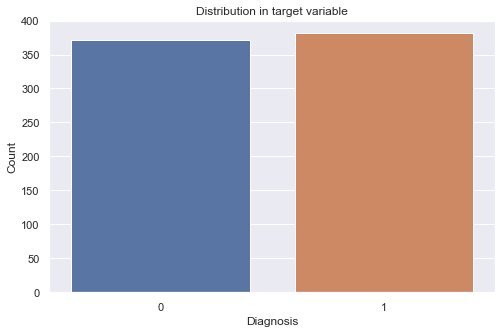

In [105]:
plt.figure(figsize = (8,5))
sns.countplot(x = diabetes_data["Diagnosis_binary"])
plt.xlabel('Diagnosis', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution in target variable', size = 12)

In [106]:
# Age and Glucose Verses the Binary Target Variable

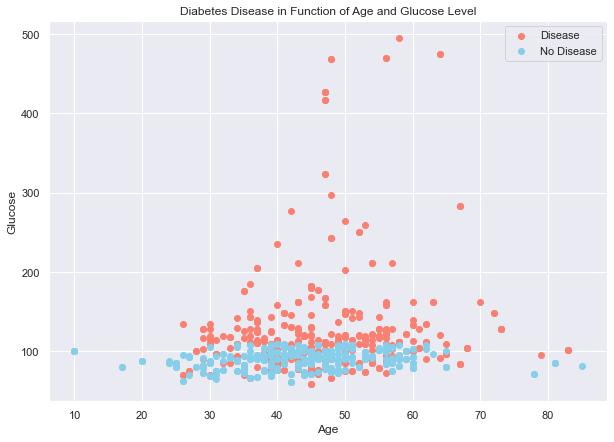

In [107]:
# Create another figure
plt.figure(figsize=(10,7))

# Start with positive examples
plt.scatter(diabetes_data.Age[diabetes_data.Diagnosis_binary==1],
            diabetes_data.FPG[diabetes_data.Diagnosis_binary==1],
            c = "salmon")

# Some Negative Examples
plt.scatter(diabetes_data.Age[diabetes_data.Diagnosis_binary == 0],
            diabetes_data.FPG[diabetes_data.Diagnosis_binary == 0],
            c = "skyblue")

# Add some other helpful information
plt.title("Diabetes Disease in Function of Age and Glucose Level")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend(["Disease", "No Disease"])

plt.show()

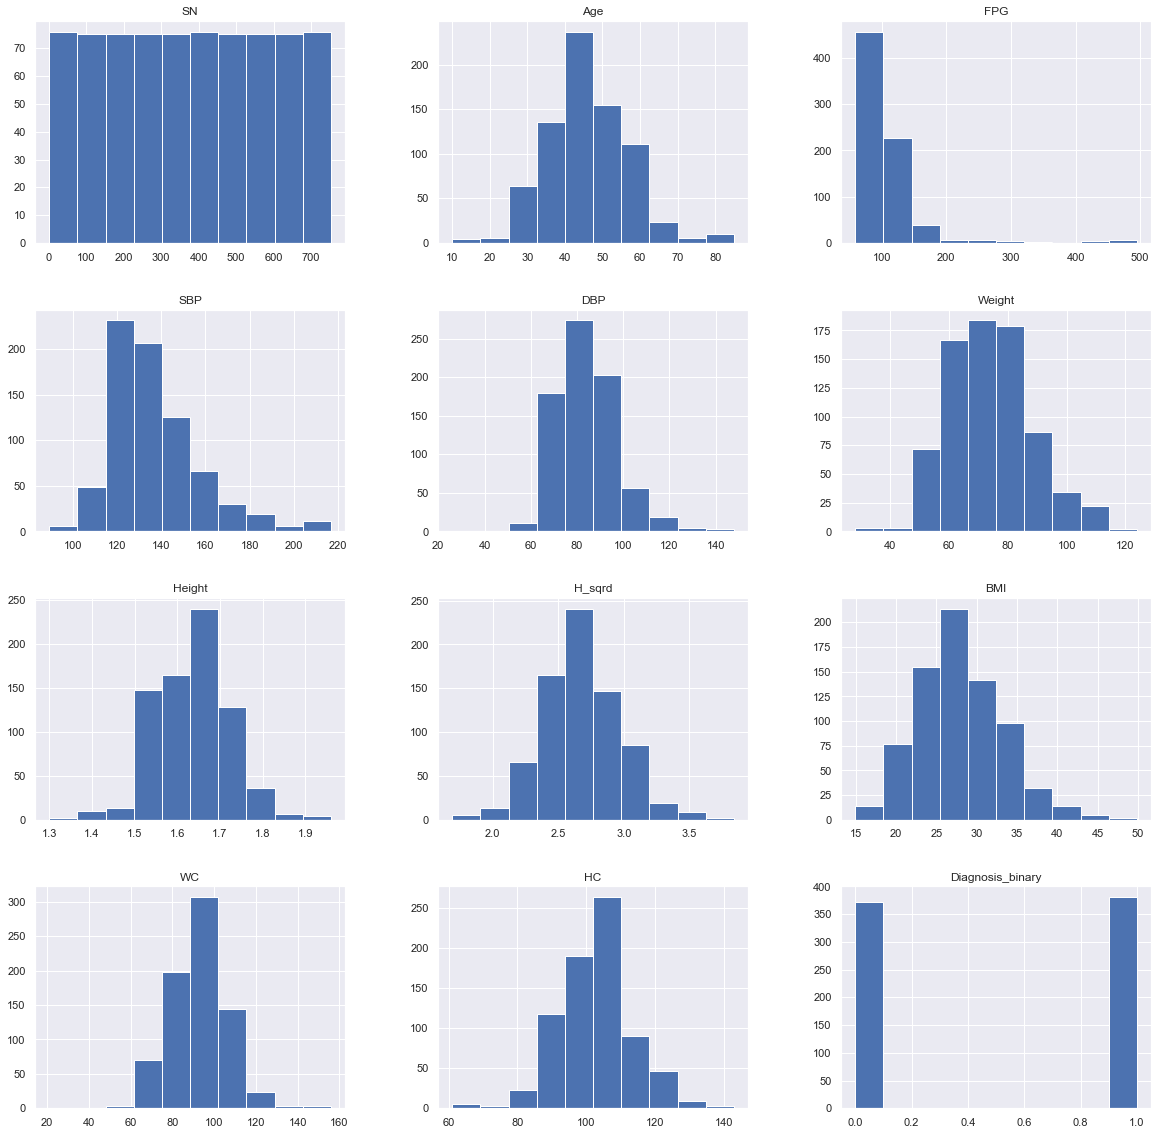

In [108]:
p = diabetes_data.hist(figsize = (20,20))

<AxesSubplot:>

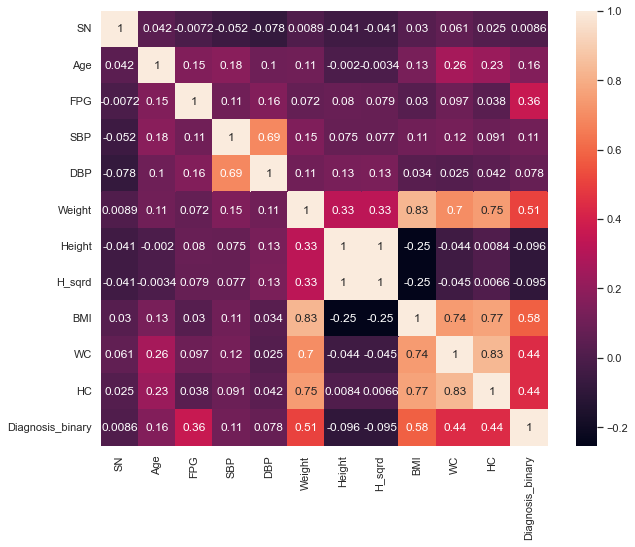

In [110]:
corr = diabetes_data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True)

<AxesSubplot:>

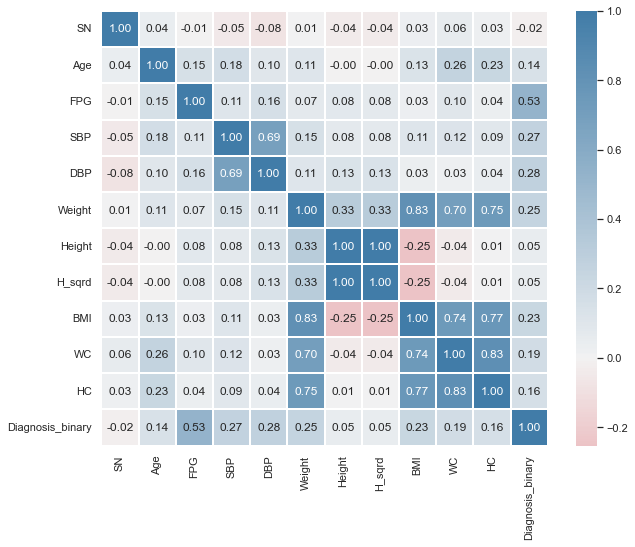

In [25]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
plt.figure(figsize = (10,8))
sns.heatmap(diabetes_data.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

<AxesSubplot:>

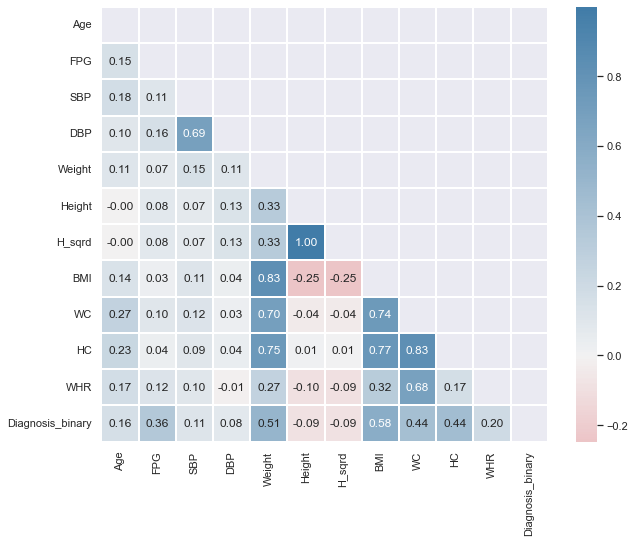

In [136]:
mask = np.triu(np.ones_like(data_copy.corr(), dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(data_copy.corr(), center=0, mask=mask, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

In [111]:
# Data Preprocessing phase 1

# Missing Data
# Dimentionality Reduction
# Scaling 
# Class Balancing

In [112]:
# Clean Diabetes Data

In [113]:
diabetes_data["Gender"].value_counts()

F     392
M     348
f       6
 M      3
Name: Gender, dtype: int64

In [114]:
diabetes_data["Gender"]= diabetes_data["Gender"].str.strip(' ')

In [115]:
diabetes_data["Gender"]= diabetes_data["Gender"].str.upper()

In [116]:
diabetes_data["Gender"].value_counts()

F    398
M    351
Name: Gender, dtype: int64

In [117]:
# Change object datatype to float

In [37]:
# Change datatype to categorical

In [38]:
diabetes_data["Gender"]= diabetes_data["Gender"].astype("category")

In [33]:
diabetes_data.Gender.describe()

count     749
unique      2
top         F
freq      398
Name: Gender, dtype: object

In [34]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SN                753 non-null    int64  
 1   Age               753 non-null    int64  
 2   Gender            749 non-null    object 
 3   FPG               753 non-null    int64  
 4   SBP               752 non-null    float64
 5   DBP               751 non-null    float64
 6   Weight            753 non-null    int64  
 7   Height            753 non-null    float64
 8   H_sqrd            753 non-null    float64
 9   BMI               753 non-null    float64
 10  WC                752 non-null    float64
 11  HC                752 non-null    float64
 12  WHR               753 non-null    object 
 13  Diagnosis_binary  753 non-null    int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 82.5+ KB


In [119]:
diabetes_data.isna().sum()

SN                  0
Age                 0
Gender              4
FPG                 0
SBP                 1
DBP                 2
Weight              0
Height              0
H_sqrd              0
BMI                 0
WC                  1
HC                  1
WHR                 0
Diagnosis_binary    0
dtype: int64

In [120]:
#diabetes_data.Diagnosis_binary = diabetes_data.Diagnosis_binary.astype("category")

In [121]:
#diabetes_data.Diagnosis_multiclass = diabetes_data.Diagnosis_multiclass.astype("category")

In [122]:
#diabetes_data.info()

In [123]:
diabetes_data.describe(exclude="number")

,Gender,WHR
count,749,753
unique,2,39
top,F,0.89
freq,398,56


In [124]:
diabetes_data.isna().sum() / len(diabetes_data)

SN                  0.000000
Age                 0.000000
Gender              0.005312
FPG                 0.000000
SBP                 0.001328
DBP                 0.002656
Weight              0.000000
Height              0.000000
H_sqrd              0.000000
BMI                 0.000000
WC                  0.001328
HC                  0.001328
WHR                 0.000000
Diagnosis_binary    0.000000
dtype: float64

In [125]:
# Drop all rows with missing values

In [126]:
diabetes_data_reduced = diabetes_data.dropna(axis=0, how ='any')
diabetes_data_reduced.shape

(746, 14)

In [127]:
diabetes_data.shape

(753, 14)

In [128]:
diabetes_data_reduced.isna().sum()

SN                  0
Age                 0
Gender              0
FPG                 0
SBP                 0
DBP                 0
Weight              0
Height              0
H_sqrd              0
BMI                 0
WC                  0
HC                  0
WHR                 0
Diagnosis_binary    0
dtype: int64

In [129]:
diabetes_data_reduced.head()

,SN,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_binary
0,1,41,M,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0
1,2,38,F,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0
2,3,35,M,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0
3,4,41,M,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0
4,5,52,M,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0


In [130]:
diabetes_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 752
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SN                746 non-null    int64  
 1   Age               746 non-null    int64  
 2   Gender            746 non-null    object 
 3   FPG               746 non-null    int64  
 4   SBP               746 non-null    float64
 5   DBP               746 non-null    float64
 6   Weight            746 non-null    int64  
 7   Height            746 non-null    float64
 8   H_sqrd            746 non-null    float64
 9   BMI               746 non-null    float64
 10  WC                746 non-null    float64
 11  HC                746 non-null    float64
 12  WHR               746 non-null    object 
 13  Diagnosis_binary  746 non-null    int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 87.4+ KB


In [132]:
data_copy = diabetes_data_reduced.copy()

In [133]:
data_copy = data_copy.drop(["SN"], axis=1)

In [134]:
data_copy['WHR'] = data_copy['WHR'].astype("float")

In [135]:
data_copy

,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_binary
0,41,M,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0
1,38,F,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0
2,35,M,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0
3,41,M,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0
4,52,M,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,31,M,76,120.0,71.0,60,1.55,2.4025,25.0,82.0,97.0,0.85,0
749,45,F,182,135.0,75.0,85,1.61,2.5921,32.8,110.0,112.0,0.98,1
750,39,F,73,127.0,70.0,85,1.69,2.8561,29.8,107.0,112.0,0.96,0
751,47,M,427,129.0,70.0,78,1.68,2.8224,27.6,107.0,107.0,1.00,1


In [137]:
# Convert Categorical variable to numerical

In [138]:
numeric = pd.get_dummies(data_copy["Gender"], prefix_sep='_', prefix="Gender")

In [139]:
# Merge nummeric gender data to data_copy

In [140]:
data_copy = pd.concat([data_copy, numeric], axis=1)
data_copy.drop("Gender", axis=1, inplace=True)
data_copy.head()

,Age,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_binary,Gender_F,Gender_M
0,41,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0,0,1
1,38,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0,1,0
2,35,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0,0,1
3,41,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0,0,1
4,52,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0,0,1


In [141]:
data_copy.shape

(746, 14)

In [142]:
# Change the order of the dataset

In [143]:
data_copy.columns

Index(['Age', 'FPG', 'SBP', 'DBP', 'Weight', 'Height', 'H_sqrd', 'BMI', 'WC',
       'HC', 'WHR', 'Diagnosis_binary', 'Gender_F', 'Gender_M'],
      dtype='object')

In [144]:
data_copy = data_copy.loc[:,['Age','Gender_F', 'Gender_M', 'FPG', 'SBP', 'DBP', 'Weight', 'Height', 'H_sqrd', 'BMI', 'WC',
       'HC', 'WHR', 'Diagnosis_binary' ]]

In [145]:
data_copy.head()

,Age,Gender_F,Gender_M,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_binary
0,41,0,1,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0
1,38,1,0,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0
2,35,0,1,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0
3,41,0,1,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0
4,52,0,1,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0


In [59]:
#data_copy['WHR'] = data_copy['WHR'].astype("float")

In [146]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 752
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               746 non-null    int64  
 1   Gender_F          746 non-null    uint8  
 2   Gender_M          746 non-null    uint8  
 3   FPG               746 non-null    int64  
 4   SBP               746 non-null    float64
 5   DBP               746 non-null    float64
 6   Weight            746 non-null    int64  
 7   Height            746 non-null    float64
 8   H_sqrd            746 non-null    float64
 9   BMI               746 non-null    float64
 10  WC                746 non-null    float64
 11  HC                746 non-null    float64
 12  WHR               746 non-null    float64
 13  Diagnosis_binary  746 non-null    int64  
dtypes: float64(8), int64(4), uint8(2)
memory usage: 77.2 KB


In [147]:
# See complete correlation of all variables
#mask = np.triu(np.ones_like(data_copy.corr(), dtype=bool))
#plt.figure(figsize=(10,8))
#sns.heatmap(data_copy.corr(), center=0, mask=mask, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

In [148]:
# Save Cleaned Data with no missing values

In [149]:
data_copy.to_csv("Diabetes data/diabetes_data_jos_clean_balanced.csv")

In [150]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 752
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               746 non-null    int64  
 1   Gender_F          746 non-null    uint8  
 2   Gender_M          746 non-null    uint8  
 3   FPG               746 non-null    int64  
 4   SBP               746 non-null    float64
 5   DBP               746 non-null    float64
 6   Weight            746 non-null    int64  
 7   Height            746 non-null    float64
 8   H_sqrd            746 non-null    float64
 9   BMI               746 non-null    float64
 10  WC                746 non-null    float64
 11  HC                746 non-null    float64
 12  WHR               746 non-null    float64
 13  Diagnosis_binary  746 non-null    int64  
dtypes: float64(8), int64(4), uint8(2)
memory usage: 77.2 KB


In [66]:
data_copy.Diagnosis_binary = data_copy.Diagnosis_binary.astype("category")

In [67]:
data_copy.Diagnosis_binary.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [68]:
data_copy.to_csv("Diabetes data/diabetes_data_jos_clean_categorical.csv")

In [ ]:
# Exploratory Data Analysis 1 Again

In [20]:
diabetes_data_1, X_1, y_1 = read_process_divide("Data/diabetes_data_jos_urban_2012.csv")

In [21]:
diabetes_data_1.head()

,Age,Gender,FPG (mg/dl),SBP (mmHg),DBP (mmHg),Weight (Kg),Height (m),H-SQRD,BMI,W.C (cm),H.C (cm),WHR
0,41,M,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91
1,38,F,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75
2,35,M,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92
3,41,M,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81
4,52,M,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80


In [22]:
diabetes_data_1.describe()

,Age,FPG (mg/dl),SBP (mmHg),DBP (mmHg),Weight (Kg),Height (m),H-SQRD,BMI,W.C (cm),H.C (cm)
count,753.000000,753.000000,752.000000,751.000000,753.000000,753.000000,753.000000,753.000000,752.000000,752.000000
mean,45.717131,109.917663,136.571809,84.070573,74.362550,1.633267,2.675479,27.936653,92.184840,102.767287
std,10.718146,54.915977,20.085109,13.338529,14.190105,0.089045,0.291055,5.298149,13.596492,11.050922
min,10.000000,59.000000,89.000000,26.000000,28.000000,1.300000,1.690000,14.900000,21.000000,61.000000
25%,39.000000,86.000000,123.000000,74.000000,65.000000,1.580000,2.496400,24.100000,83.000000,95.000000
50%,45.000000,97.000000,131.000000,82.000000,73.000000,1.630000,2.656900,27.600000,92.000000,103.000000
75%,52.000000,113.000000,146.000000,92.000000,83.000000,1.690000,2.856100,31.100000,100.000000,110.000000
max,85.000000,495.000000,217.000000,148.000000,124.000000,1.960000,3.841600,49.900000,156.000000,143.000000


## Exploratory Data Analysis- Step One

In [25]:
diabetes_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          753 non-null    int64  
 1   Gender       749 non-null    object 
 2   FPG (mg/dl)  753 non-null    int64  
 3   SBP (mmHg)   752 non-null    float64
 4   DBP (mmHg)   751 non-null    float64
 5   Weight (Kg)  753 non-null    int64  
 6   Height (m)   753 non-null    float64
 7   H-SQRD       753 non-null    float64
 8   BMI          753 non-null    float64
 9   W.C (cm)     752 non-null    float64
 10  H.C (cm)     752 non-null    float64
 11  WHR          753 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 70.7+ KB


In [26]:
diabetes_data_1.isna().sum()

Age            0
Gender         4
FPG (mg/dl)    0
SBP (mmHg)     1
DBP (mmHg)     2
Weight (Kg)    0
Height (m)     0
H-SQRD         0
BMI            0
W.C (cm)       1
H.C (cm)       1
WHR            0
dtype: int64

In [30]:
diabetes_data_1.isna().sum()

Age            0
Gender         4
FPG (mg/dl)    0
SBP (mmHg)     1
DBP (mmHg)     2
Weight (Kg)    0
Height (m)     0
H-SQRD         0
BMI            0
W.C (cm)       1
H.C (cm)       1
WHR            0
dtype: int64

In [4]:
# Exploratory Data Analysis 4 and 5

In [13]:
diabetes_data, X, y = read_process_divide("Data/diabetes_data_jos_urban_2012_no_missing_values_Updated_2.csv")

In [14]:
# Exploratory Data Analysis

In [15]:
diabetes_data.head()

,Age,Gender_F,Gender_M,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis
0,41,0,1,109,155,95,80,1.71,2.9241,27.4,68,75,0.91,0
1,38,1,0,93,137,89,55,1.57,2.4649,22.3,77,103,0.75,0
2,35,0,1,83,137,82,78,1.66,2.7556,28.3,94,102,0.92,0
3,41,0,1,84,121,70,59,1.63,2.6569,22.2,74,91,0.81,0
4,52,0,1,81,143,87,59,1.73,2.9929,19.7,72,90,0.80,0


In [16]:
diabetes_data.tail()

,Age,Gender_F,Gender_M,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis
741,31,0,1,76,120,71,60,1.55,2.4025,25.0,82,97,0.85,0
742,45,1,0,182,135,75,85,1.61,2.5921,32.8,110,112,0.98,1
743,39,1,0,73,127,70,85,1.69,2.8561,29.8,107,112,0.96,0
744,47,0,1,427,129,70,78,1.68,2.8224,27.6,107,107,1.00,1
745,56,0,1,127,130,75,82,1.67,2.7889,29.4,89,93,0.96,1


In [8]:
# Rename Columns names

In [96]:
#print(diabetes_data.columns)

Index(['Serial Number', 'Age', 'Gender', 'FPG (mg/dl)', 'SBP (mmHg)',
       'DBP (mmHg)', 'Weight (Kg)', 'Height (m)', 'H-SQRD', 'BMI', 'W.C (cm)',
       'H.C (cm)', 'WHR', 'diagnosis'],
      dtype='object')


In [97]:
#diabetes_data.columns = ['SN', 'Age','Gender','FPG', 'SBP', 'DBP','Weight', 'Height', 'H_sqrd','BMI','WC', 'HC', 'WHR', 'Diagnosis_binary']

In [98]:
#print(diabetes_data.columns)

Index(['SN', 'Age', 'Gender', 'FPG', 'SBP', 'DBP', 'Weight', 'Height',
       'H_sqrd', 'BMI', 'WC', 'HC', 'WHR', 'Diagnosis_binary'],
      dtype='object')


In [17]:
diabetes_data.head()

,Age,Gender_F,Gender_M,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis
0,41,0,1,109,155,95,80,1.71,2.9241,27.4,68,75,0.91,0
1,38,1,0,93,137,89,55,1.57,2.4649,22.3,77,103,0.75,0
2,35,0,1,83,137,82,78,1.66,2.7556,28.3,94,102,0.92,0
3,41,0,1,84,121,70,59,1.63,2.6569,22.2,74,91,0.81,0
4,52,0,1,81,143,87,59,1.73,2.9929,19.7,72,90,0.80,0


In [18]:
diabetes_data.shape

(746, 14)

In [19]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        746 non-null    int64  
 1   Gender_F   746 non-null    int64  
 2   Gender_M   746 non-null    int64  
 3   FPG        746 non-null    int64  
 4   SBP        746 non-null    int64  
 5   DBP        746 non-null    int64  
 6   Weight     746 non-null    int64  
 7   Height     746 non-null    float64
 8   H_sqrd     746 non-null    float64
 9   BMI        746 non-null    float64
 10  WC         746 non-null    int64  
 11  HC         746 non-null    int64  
 12  WHR        746 non-null    float64
 13  Diagnosis  746 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 81.7 KB


In [45]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SN,746.0,379.168901,216.387897,1.00,193.2500,379.5000,565.7500,753.0000
Age,746.0,45.762735,10.738690,10.00,39.0000,45.0000,52.0000,85.0000
FPG,746.0,110.163539,55.102297,59.00,86.0000,97.0000,113.0000,495.0000
SBP,746.0,136.615282,20.141999,89.00,123.0000,131.0000,146.0000,217.0000
DBP,746.0,84.117962,13.358135,26.00,74.0000,82.0000,92.0000,148.0000
Weight,746.0,74.392761,14.227015,28.00,64.2500,73.5000,83.0000,124.0000
Height,746.0,1.633164,0.089102,1.30,1.5800,1.6300,1.6900,1.9600
H_sqrd,746.0,2.675152,0.291219,1.69,2.4964,2.6569,2.8561,3.8416
BMI,746.0,27.947989,5.295347,14.90,24.1250,27.6000,31.1000,49.9000
WC,746.0,92.210456,13.620551,21.00,83.0000,92.0000,100.0000,156.0000


In [46]:
diabetes_data["Diagnosis_2"].value_counts()

0    653
1     93
Name: Diagnosis_2, dtype: int64

In [72]:
# Distribution of the binary target variable

Text(0.5, 1.0, 'Distribution in target variable')

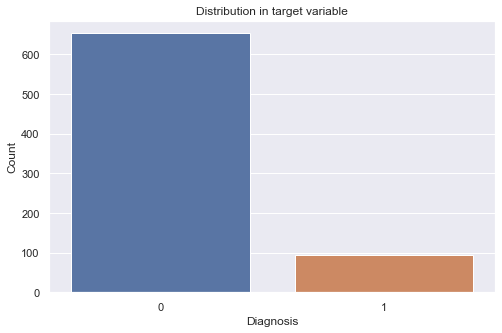

In [48]:
plt.figure(figsize = (8,5))
sns.countplot(x = diabetes_data["Diagnosis_2"])
plt.xlabel('Diagnosis', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution in target variable', size = 12)

In [49]:
# Age and Glucose Verses the Binary Target Variable

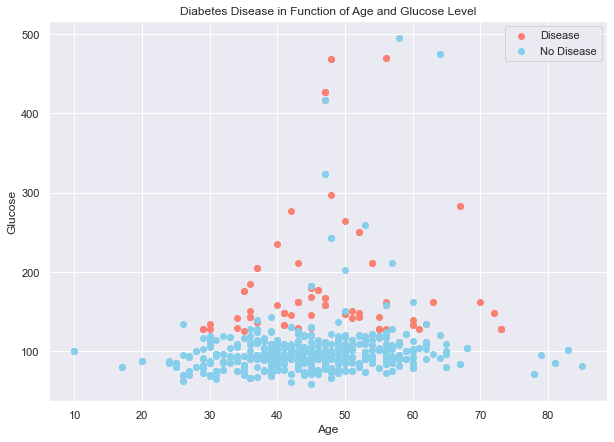

In [73]:
# Create another figure
plt.figure(figsize=(10,7))

# Start with positive examples
plt.scatter(diabetes_data.Age[diabetes_data.Diagnosis_2==1],
            diabetes_data.FPG[diabetes_data.Diagnosis_2==1],
            c = "salmon")

# Some Negative Examples
plt.scatter(diabetes_data.Age[diabetes_data.Diagnosis_2 == 0],
            diabetes_data.FPG[diabetes_data.Diagnosis_2 == 0],
            c = "skyblue")

# Add some other helpful information
plt.title("Diabetes Disease in Function of Age and Glucose Level")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend(["Disease", "No Disease"])

plt.show()

In [49]:
# BMI and Glucose Verses the Binary Target Variable

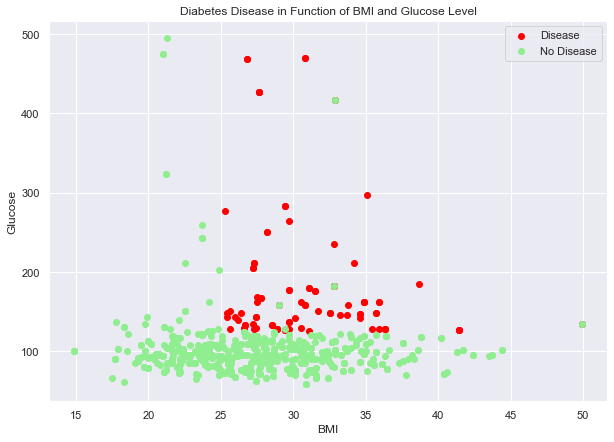

In [75]:
# Create another figure
plt.figure(figsize=(10,7))

# Start with positive examples
plt.scatter(diabetes_data.BMI[diabetes_data.Diagnosis_2==1],
            diabetes_data.FPG[diabetes_data.Diagnosis_2==1],
            c = "red")

# Some Negative Examples
plt.scatter(diabetes_data.BMI[diabetes_data.Diagnosis_2 == 0],
            diabetes_data.FPG[diabetes_data.Diagnosis_2 == 0],
            c = "lightgreen")

# Add some other helpful information
plt.title("Diabetes Disease in Function of BMI and Glucose Level")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.legend(["Disease", "No Disease"])

plt.show()

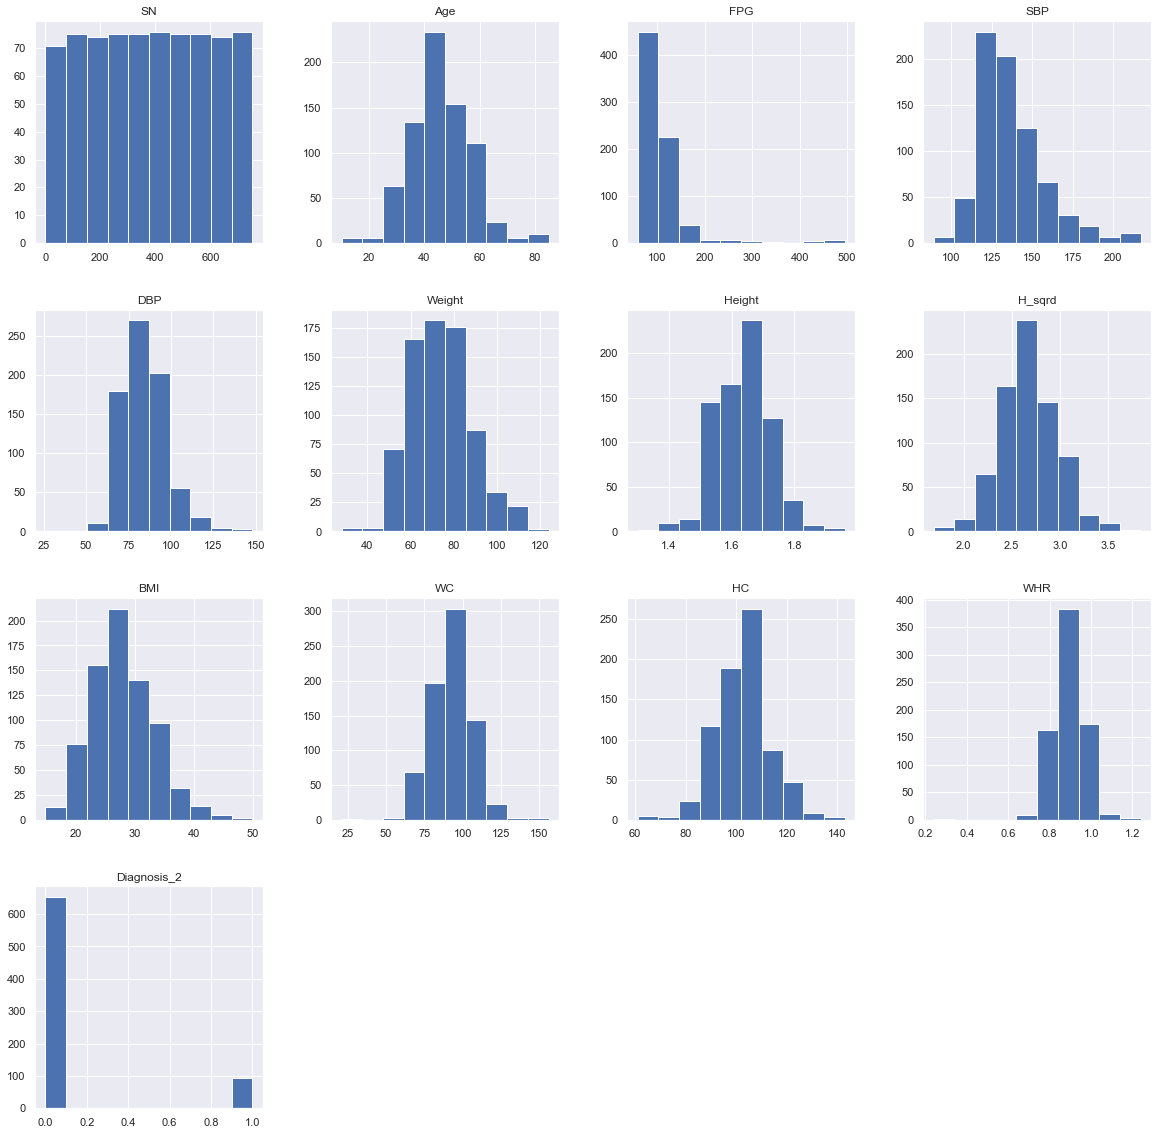

In [51]:
p = diabetes_data.hist(figsize = (20,20))

<AxesSubplot:>

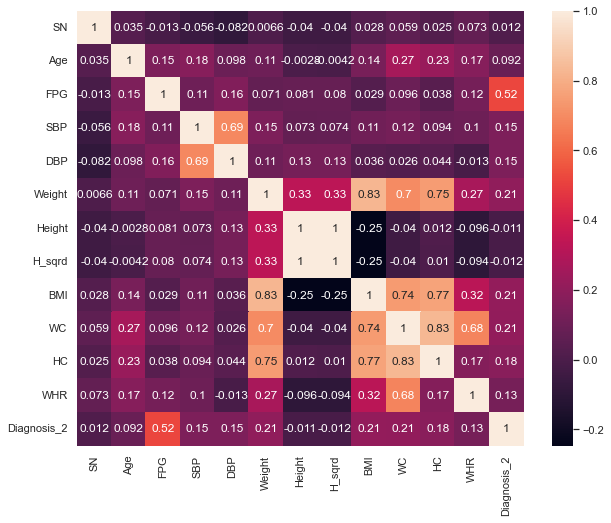

In [52]:
corr = diabetes_data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True)

<AxesSubplot:>

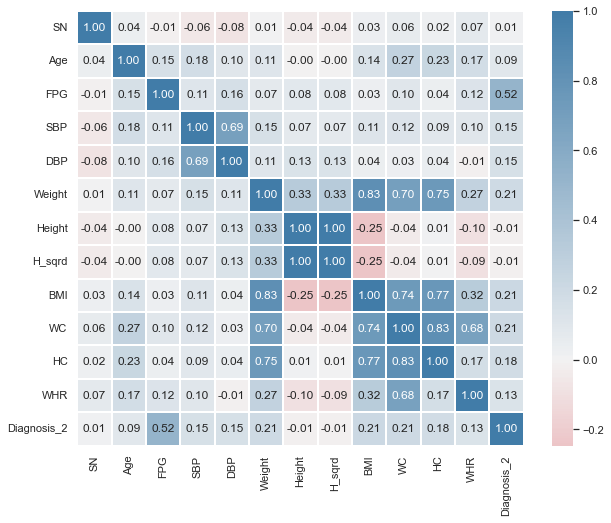

In [53]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
plt.figure(figsize = (10,8))
sns.heatmap(diabetes_data.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

<AxesSubplot:>

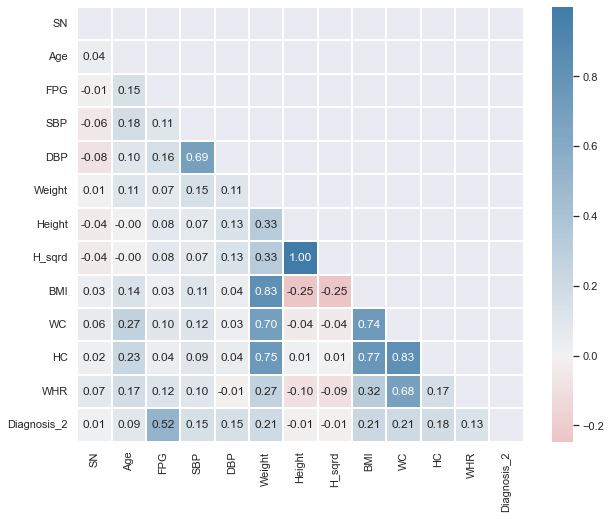

In [58]:
mask = np.triu(np.ones_like(data_copy.corr(), dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(data_copy.corr(), center=0, mask=mask, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

In [20]:
# Data Preprocessing phase 1

# Missing Data
# Dimentionality Reduction
# Scaling 
# Class Balancing

In [21]:
# Clean Diabetes Data

In [54]:
diabetes_data["Gender"].value_counts()

F    397
M    349
Name: Gender, dtype: int64

In [114]:
#diabetes_data["Gender"]= diabetes_data["Gender"].str.strip(' ')

In [115]:
#diabetes_data["Gender"]= diabetes_data["Gender"].str.upper()

In [116]:
#diabetes_data["Gender"].value_counts()

F    398
M    351
Name: Gender, dtype: int64

In [117]:
# Change object datatype to float

In [37]:
# Change datatype to categorical

In [38]:
#diabetes_data["Gender"]= diabetes_data["Gender"].astype("category")

In [55]:
diabetes_data.Gender.describe()

count     746
unique      2
top         F
freq      397
Name: Gender, dtype: object

In [34]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SN                753 non-null    int64  
 1   Age               753 non-null    int64  
 2   Gender            749 non-null    object 
 3   FPG               753 non-null    int64  
 4   SBP               752 non-null    float64
 5   DBP               751 non-null    float64
 6   Weight            753 non-null    int64  
 7   Height            753 non-null    float64
 8   H_sqrd            753 non-null    float64
 9   BMI               753 non-null    float64
 10  WC                752 non-null    float64
 11  HC                752 non-null    float64
 12  WHR               753 non-null    object 
 13  Diagnosis_binary  753 non-null    int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 82.5+ KB


In [119]:
diabetes_data.isna().sum()

SN                  0
Age                 0
Gender              4
FPG                 0
SBP                 1
DBP                 2
Weight              0
Height              0
H_sqrd              0
BMI                 0
WC                  1
HC                  1
WHR                 0
Diagnosis_binary    0
dtype: int64

In [120]:
#diabetes_data.Diagnosis_binary = diabetes_data.Diagnosis_binary.astype("category")

In [121]:
#diabetes_data.Diagnosis_multiclass = diabetes_data.Diagnosis_multiclass.astype("category")

In [122]:
#diabetes_data.info()

In [24]:
diabetes_data.describe(exclude="number")

,Gender
count,746
unique,2
top,F
freq,397


In [124]:
#diabetes_data.isna().sum() / len(diabetes_data)

SN                  0.000000
Age                 0.000000
Gender              0.005312
FPG                 0.000000
SBP                 0.001328
DBP                 0.002656
Weight              0.000000
Height              0.000000
H_sqrd              0.000000
BMI                 0.000000
WC                  0.001328
HC                  0.001328
WHR                 0.000000
Diagnosis_binary    0.000000
dtype: float64

In [125]:
# Drop all rows with missing values

In [126]:
#diabetes_data_reduced = diabetes_data.dropna(axis=0, how ='any')
#diabetes_data_reduced.shape

(746, 14)

In [56]:
diabetes_data.shape

(746, 14)

In [128]:
#diabetes_data_reduced.isna().sum()

SN                  0
Age                 0
Gender              0
FPG                 0
SBP                 0
DBP                 0
Weight              0
Height              0
H_sqrd              0
BMI                 0
WC                  0
HC                  0
WHR                 0
Diagnosis_binary    0
dtype: int64

In [129]:
#diabetes_data_reduced.head()

,SN,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_binary
0,1,41,M,109,155.0,95.0,80,1.71,2.9241,27.4,68.0,75.0,0.91,0
1,2,38,F,93,137.0,89.0,55,1.57,2.4649,22.3,77.0,103.0,0.75,0
2,3,35,M,83,137.0,82.0,78,1.66,2.7556,28.3,94.0,102.0,0.92,0
3,4,41,M,84,121.0,70.0,59,1.63,2.6569,22.2,74.0,91.0,0.81,0
4,5,52,M,81,143.0,87.0,59,1.73,2.9929,19.7,72.0,90.0,0.80,0


In [130]:
#diabetes_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 752
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SN                746 non-null    int64  
 1   Age               746 non-null    int64  
 2   Gender            746 non-null    object 
 3   FPG               746 non-null    int64  
 4   SBP               746 non-null    float64
 5   DBP               746 non-null    float64
 6   Weight            746 non-null    int64  
 7   Height            746 non-null    float64
 8   H_sqrd            746 non-null    float64
 9   BMI               746 non-null    float64
 10  WC                746 non-null    float64
 11  HC                746 non-null    float64
 12  WHR               746 non-null    object 
 13  Diagnosis_binary  746 non-null    int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 87.4+ KB


In [57]:
data_copy = diabetes_data.copy()

In [59]:
data_copy = data_copy.drop(["SN"], axis=1)

In [60]:
#data_copy['WHR'] = data_copy['WHR'].astype("float")

In [61]:
data_copy

,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_2
0,41,M,109,155,95,80,1.71,2.9241,27.4,68,75,0.91,0
1,38,F,93,137,89,55,1.57,2.4649,22.3,77,103,0.75,0
2,35,M,83,137,82,78,1.66,2.7556,28.3,94,102,0.92,0
3,41,M,84,121,70,59,1.63,2.6569,22.2,74,91,0.81,0
4,52,M,81,143,87,59,1.73,2.9929,19.7,72,90,0.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,31,M,76,120,71,60,1.55,2.4025,25.0,82,97,0.85,0
742,45,F,182,135,75,85,1.61,2.5921,32.8,110,112,0.98,1
743,39,F,73,127,70,85,1.69,2.8561,29.8,107,112,0.96,0
744,47,M,427,129,70,78,1.68,2.8224,27.6,107,107,1.00,1


In [62]:
# Convert Categorical variable to numerical

In [63]:
numeric = pd.get_dummies(data_copy["Gender"], prefix_sep='_', prefix="Gender")

In [64]:
# Merge nummeric gender data to data_copy

In [65]:
data_copy = pd.concat([data_copy, numeric], axis=1)
data_copy.drop("Gender", axis=1, inplace=True)
data_copy.head()

,Age,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_2,Gender_F,Gender_M
0,41,109,155,95,80,1.71,2.9241,27.4,68,75,0.91,0,0,1
1,38,93,137,89,55,1.57,2.4649,22.3,77,103,0.75,0,1,0
2,35,83,137,82,78,1.66,2.7556,28.3,94,102,0.92,0,0,1
3,41,84,121,70,59,1.63,2.6569,22.2,74,91,0.81,0,0,1
4,52,81,143,87,59,1.73,2.9929,19.7,72,90,0.80,0,0,1


In [66]:
data_copy.shape

(746, 14)

In [33]:
# Change the order of the dataset

In [67]:
data_copy.columns

Index(['Age', 'FPG', 'SBP', 'DBP', 'Weight', 'Height', 'H_sqrd', 'BMI', 'WC',
       'HC', 'WHR', 'Diagnosis_2', 'Gender_F', 'Gender_M'],
      dtype='object')

In [68]:
data_copy = data_copy.loc[:,['Age','Gender_F', 'Gender_M', 'FPG', 'SBP', 'DBP', 'Weight', 'Height', 'H_sqrd', 'BMI', 'WC',
       'HC', 'WHR', 'Diagnosis_2' ]]

In [69]:
data_copy.head()

,Age,Gender_F,Gender_M,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_2
0,41,0,1,109,155,95,80,1.71,2.9241,27.4,68,75,0.91,0
1,38,1,0,93,137,89,55,1.57,2.4649,22.3,77,103,0.75,0
2,35,0,1,83,137,82,78,1.66,2.7556,28.3,94,102,0.92,0
3,41,0,1,84,121,70,59,1.63,2.6569,22.2,74,91,0.81,0
4,52,0,1,81,143,87,59,1.73,2.9929,19.7,72,90,0.80,0


In [59]:
#data_copy['WHR'] = data_copy['WHR'].astype("float")

In [70]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          746 non-null    int64  
 1   Gender_F     746 non-null    uint8  
 2   Gender_M     746 non-null    uint8  
 3   FPG          746 non-null    int64  
 4   SBP          746 non-null    int64  
 5   DBP          746 non-null    int64  
 6   Weight       746 non-null    int64  
 7   Height       746 non-null    float64
 8   H_sqrd       746 non-null    float64
 9   BMI          746 non-null    float64
 10  WC           746 non-null    int64  
 11  HC           746 non-null    int64  
 12  WHR          746 non-null    float64
 13  Diagnosis_2  746 non-null    int64  
dtypes: float64(4), int64(8), uint8(2)
memory usage: 71.5 KB


In [147]:
# See complete correlation of all variables
#mask = np.triu(np.ones_like(data_copy.corr(), dtype=bool))
#plt.figure(figsize=(10,8))
#sns.heatmap(data_copy.corr(), center=0, mask=mask, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

In [148]:
# Save Cleaned Data with no missing values

In [71]:
data_copy.to_csv("Data/diabetes_data_jos_urban_2012_no_missing_values_Updated_2.csv")

In [150]:
#data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 752
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               746 non-null    int64  
 1   Gender_F          746 non-null    uint8  
 2   Gender_M          746 non-null    uint8  
 3   FPG               746 non-null    int64  
 4   SBP               746 non-null    float64
 5   DBP               746 non-null    float64
 6   Weight            746 non-null    int64  
 7   Height            746 non-null    float64
 8   H_sqrd            746 non-null    float64
 9   BMI               746 non-null    float64
 10  WC                746 non-null    float64
 11  HC                746 non-null    float64
 12  WHR               746 non-null    float64
 13  Diagnosis_binary  746 non-null    int64  
dtypes: float64(8), int64(4), uint8(2)
memory usage: 77.2 KB


In [66]:
#data_copy.Diagnosis_binary = data_copy.Diagnosis_binary.astype("category")

In [67]:
#data_copy.Diagnosis_binary.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [68]:
#data_copy.to_csv("Diabetes data/diabetes_data_jos_clean_categorical.csv")

In [5]:
# Exploratory Data Analysis 6

In [7]:
diabetes_data, X, y = read_process_divide("Datasets/diabetes_data_jos_urban_2012_no_missing_values_Updated_3.csv")

In [8]:
# Exploratory Data Analysis

In [9]:
diabetes_data.head()

,SN,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_4
0,1,41,M,109,155,95,80,1.71,2.9241,27.4,68,75,0.91,0.0
1,2,38,F,93,137,89,55,1.57,2.4649,22.3,77,103,0.75,0.0
2,3,35,M,83,137,82,78,1.66,2.7556,28.3,94,102,0.92,0.0
3,4,41,M,84,121,70,59,1.63,2.6569,22.2,74,91,0.81,0.0
4,5,52,M,81,143,87,59,1.73,2.9929,19.7,72,90,0.80,0.0


In [10]:
diabetes_data.tail()

,SN,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_4
741,749,31,M,76,120,71,60,1.55,2.4025,25.0,82,97,0.85,0.0
742,750,45,F,182,135,75,85,1.61,2.5921,32.8,110,112,0.98,1.0
743,751,39,F,73,127,70,85,1.69,2.8561,29.8,107,112,0.96,0.0
744,752,47,M,427,129,70,78,1.68,2.8224,27.6,107,107,1.00,1.0
745,753,56,M,127,130,75,82,1.67,2.7889,29.4,89,93,0.96,0.0


In [11]:
# Rename Columns names

In [12]:
#print(diabetes_data.columns)

In [13]:
#diabetes_data.columns = ['SN', 'Age','Gender','FPG', 'SBP', 'DBP','Weight', 'Height', 'H_sqrd','BMI','WC', 'HC', 'WHR', 'Diagnosis_binary']

In [14]:
#print(diabetes_data.columns)

In [15]:
diabetes_data.head()

,SN,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_4
0,1,41,M,109,155,95,80,1.71,2.9241,27.4,68,75,0.91,0.0
1,2,38,F,93,137,89,55,1.57,2.4649,22.3,77,103,0.75,0.0
2,3,35,M,83,137,82,78,1.66,2.7556,28.3,94,102,0.92,0.0
3,4,41,M,84,121,70,59,1.63,2.6569,22.2,74,91,0.81,0.0
4,5,52,M,81,143,87,59,1.73,2.9929,19.7,72,90,0.80,0.0


In [16]:
diabetes_data.shape

(746, 14)

In [17]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SN           746 non-null    int64  
 1   Age          746 non-null    int64  
 2   Gender       746 non-null    object 
 3   FPG          746 non-null    int64  
 4   SBP          746 non-null    int64  
 5   DBP          746 non-null    int64  
 6   Weight       746 non-null    int64  
 7   Height       746 non-null    float64
 8   H_sqrd       746 non-null    float64
 9   BMI          746 non-null    float64
 10  WC           746 non-null    int64  
 11  HC           746 non-null    int64  
 12  WHR          746 non-null    float64
 13  Diagnosis_4  743 non-null    float64
dtypes: float64(5), int64(8), object(1)
memory usage: 81.7+ KB


In [18]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SN,746.0,379.168901,216.387897,1.00,193.2500,379.5000,565.7500,753.0000
Age,746.0,45.762735,10.738690,10.00,39.0000,45.0000,52.0000,85.0000
FPG,746.0,110.163539,55.102297,59.00,86.0000,97.0000,113.0000,495.0000
SBP,746.0,136.615282,20.141999,89.00,123.0000,131.0000,146.0000,217.0000
DBP,746.0,84.117962,13.358135,26.00,74.0000,82.0000,92.0000,148.0000
Weight,746.0,74.392761,14.227015,28.00,64.2500,73.5000,83.0000,124.0000
Height,746.0,1.633164,0.089102,1.30,1.5800,1.6300,1.6900,1.9600
H_sqrd,746.0,2.675152,0.291219,1.69,2.4964,2.6569,2.8561,3.8416
BMI,746.0,27.947989,5.295347,14.90,24.1250,27.6000,31.1000,49.9000
WC,746.0,92.210456,13.620551,21.00,83.0000,92.0000,100.0000,156.0000


In [20]:
diabetes_data["Diagnosis_4"].value_counts()

0.0    693
1.0     50
Name: Diagnosis_4, dtype: int64

In [21]:
# Distribution of the binary target variable

Text(0.5, 1.0, 'Distribution in target variable')

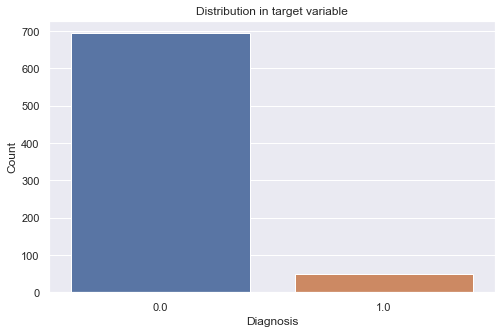

In [22]:
plt.figure(figsize = (8,5))
sns.countplot(x = diabetes_data["Diagnosis_4"])
plt.xlabel('Diagnosis', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution in target variable', size = 12)

In [23]:
# Age and Glucose Verses the Binary Target Variable

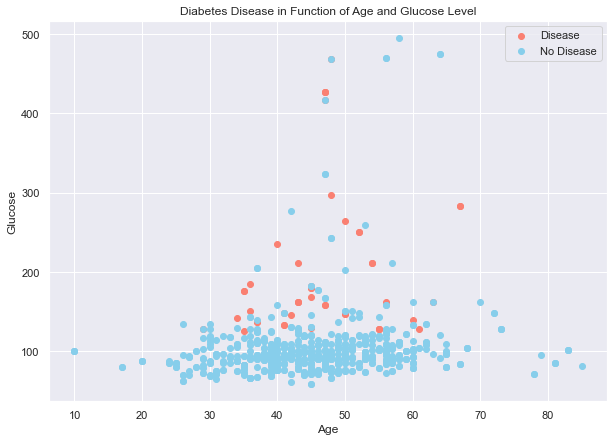

In [24]:
# Create another figure
plt.figure(figsize=(10,7))

# Start with positive examples
plt.scatter(diabetes_data.Age[diabetes_data.Diagnosis_4==1],
            diabetes_data.FPG[diabetes_data.Diagnosis_4==1],
            c = "salmon")

# Some Negative Examples
plt.scatter(diabetes_data.Age[diabetes_data.Diagnosis_4 == 0],
            diabetes_data.FPG[diabetes_data.Diagnosis_4 == 0],
            c = "skyblue")

# Add some other helpful information
plt.title("Diabetes Disease in Function of Age and Glucose Level")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend(["Disease", "No Disease"])

plt.show()

In [25]:
# BMI and Glucose Verses the Binary Target Variable

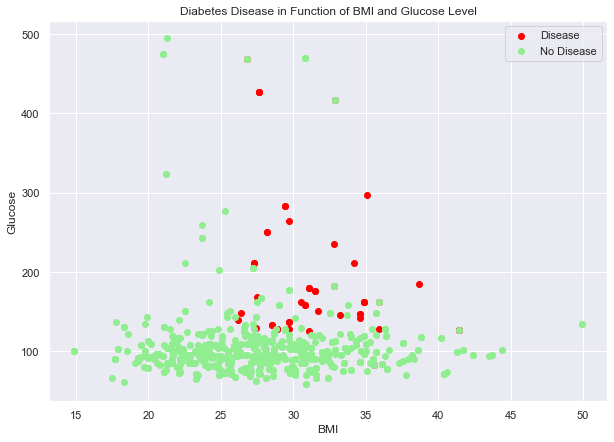

In [26]:
# Create another figure
plt.figure(figsize=(10,7))

# Start with positive examples
plt.scatter(diabetes_data.BMI[diabetes_data.Diagnosis_4==1],
            diabetes_data.FPG[diabetes_data.Diagnosis_4==1],
            c = "red")

# Some Negative Examples
plt.scatter(diabetes_data.BMI[diabetes_data.Diagnosis_4 == 0],
            diabetes_data.FPG[diabetes_data.Diagnosis_4 == 0],
            c = "lightgreen")

# Add some other helpful information
plt.title("Diabetes Disease in Function of BMI and Glucose Level")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.legend(["Disease", "No Disease"])

plt.show()

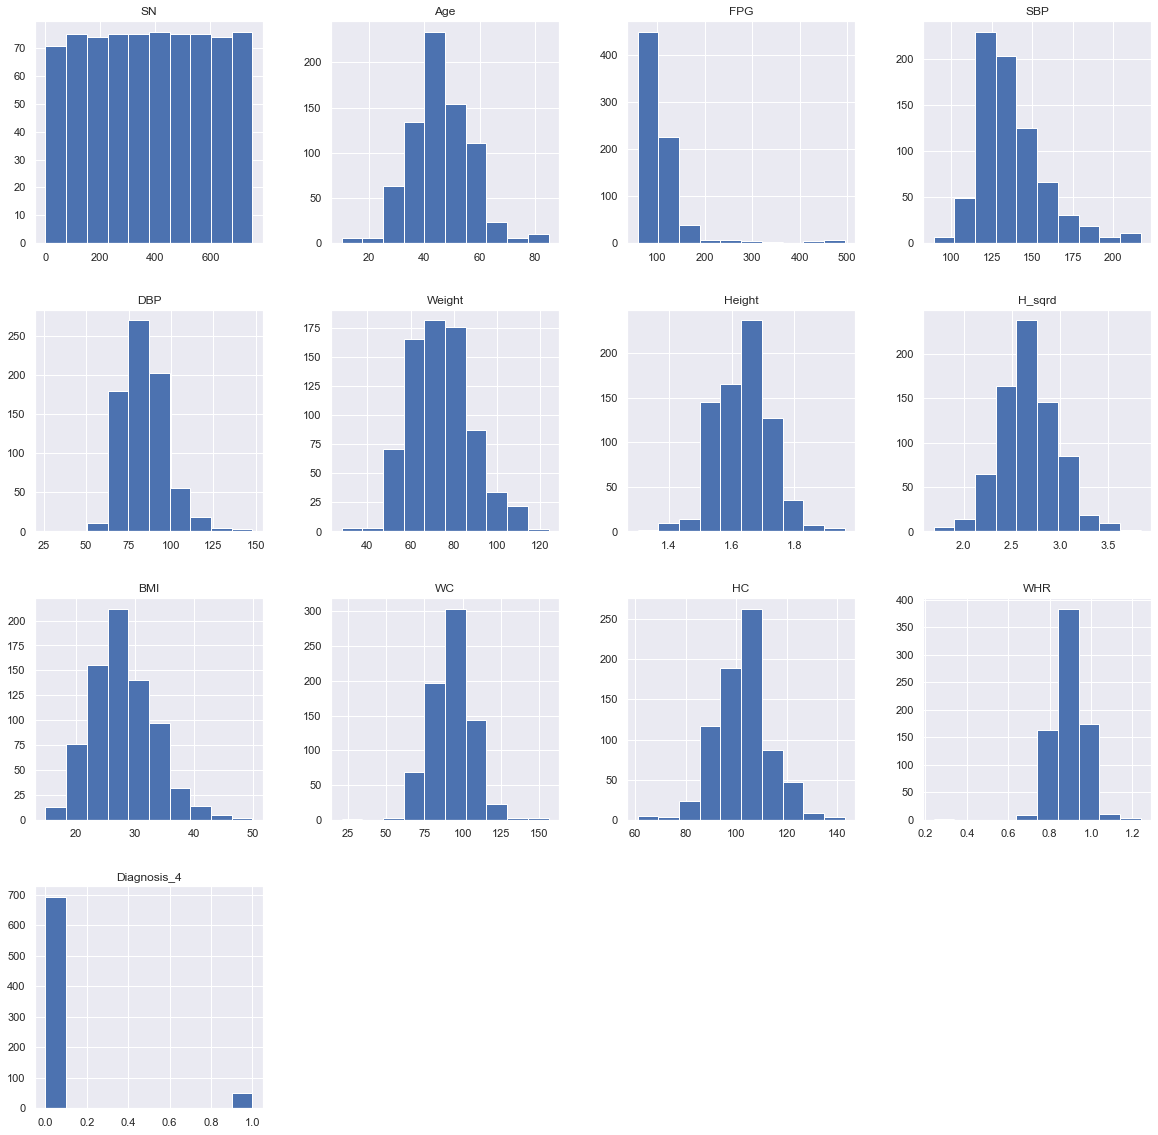

In [27]:
p = diabetes_data.hist(figsize = (20,20))

<AxesSubplot:>

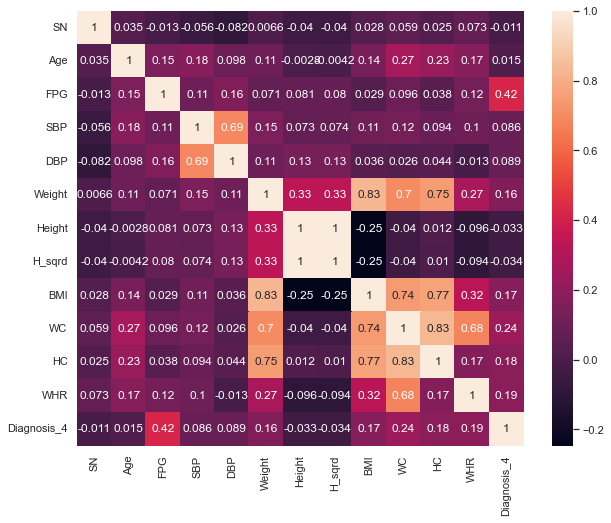

In [28]:
corr = diabetes_data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True)

<AxesSubplot:>

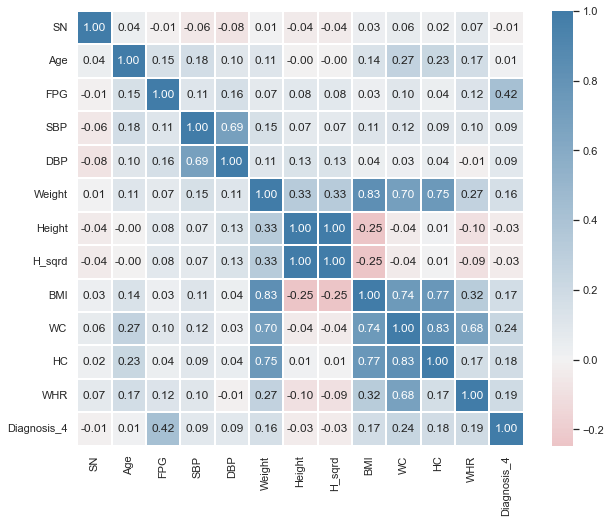

In [29]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
plt.figure(figsize = (10,8))
sns.heatmap(diabetes_data.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

<AxesSubplot:>

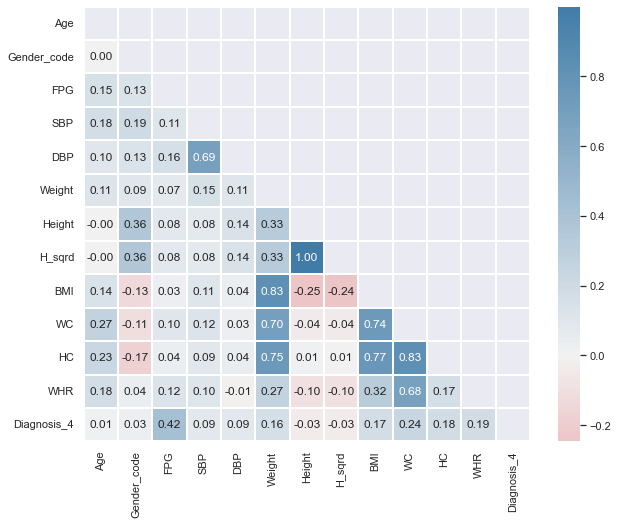

In [90]:
mask = np.triu(np.ones_like(data_copy.corr(), dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(data_copy.corr(), center=0, mask=mask, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

In [31]:
# Data Preprocessing phase 1

# Missing Data
# Dimentionality Reduction
# Scaling 
# Class Balancing

In [32]:
# Clean Diabetes Data

In [33]:
diabetes_data["Gender"].value_counts()

F    397
M    349
Name: Gender, dtype: int64

In [34]:
#diabetes_data["Gender"]= diabetes_data["Gender"].str.strip(' ')

In [35]:
#diabetes_data["Gender"]= diabetes_data["Gender"].str.upper()

In [36]:
#diabetes_data["Gender"].value_counts()

In [37]:
# Change object datatype to float

In [38]:
# Change datatype to categorical

In [39]:
#diabetes_data["Gender"]= diabetes_data["Gender"].astype("category")

In [40]:
diabetes_data.Gender.describe()

count     746
unique      2
top         F
freq      397
Name: Gender, dtype: object

In [41]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SN           746 non-null    int64  
 1   Age          746 non-null    int64  
 2   Gender       746 non-null    object 
 3   FPG          746 non-null    int64  
 4   SBP          746 non-null    int64  
 5   DBP          746 non-null    int64  
 6   Weight       746 non-null    int64  
 7   Height       746 non-null    float64
 8   H_sqrd       746 non-null    float64
 9   BMI          746 non-null    float64
 10  WC           746 non-null    int64  
 11  HC           746 non-null    int64  
 12  WHR          746 non-null    float64
 13  Diagnosis_4  743 non-null    float64
dtypes: float64(5), int64(8), object(1)
memory usage: 81.7+ KB


In [42]:
#diabetes_data.isna().sum()

In [43]:
#diabetes_data.Diagnosis_binary = diabetes_data.Diagnosis_binary.astype("category")

In [44]:
#diabetes_data.Diagnosis_multiclass = diabetes_data.Diagnosis_multiclass.astype("category")

In [45]:
#diabetes_data.info()

In [46]:
diabetes_data.describe(exclude="number")

,Gender
count,746
unique,2
top,F
freq,397


In [66]:
diabetes_data.isna().sum() / len(diabetes_data)

SN             0.000000
Age            0.000000
Gender         0.000000
FPG            0.000000
SBP            0.000000
DBP            0.000000
Weight         0.000000
Height         0.000000
H_sqrd         0.000000
BMI            0.000000
WC             0.000000
HC             0.000000
WHR            0.000000
Diagnosis_4    0.004021
dtype: float64

In [67]:
# Drop all rows with missing values

In [68]:
diabetes_data_reduced = diabetes_data.dropna(axis=0, how ='any')
diabetes_data_reduced.shape

(743, 14)

In [69]:
diabetes_data.shape

(746, 14)

In [51]:
#diabetes_data_reduced.isna().sum()

In [52]:
#diabetes_data_reduced.head()

In [53]:
#diabetes_data_reduced.info()

In [70]:
data_copy = diabetes_data_reduced.copy()

In [71]:
data_copy = data_copy.drop(["SN"], axis=1)

In [56]:
#data_copy['WHR'] = data_copy['WHR'].astype("float")

In [72]:
data_copy

,Age,Gender,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_4
0,41,M,109,155,95,80,1.71,2.9241,27.4,68,75,0.91,0.0
1,38,F,93,137,89,55,1.57,2.4649,22.3,77,103,0.75,0.0
2,35,M,83,137,82,78,1.66,2.7556,28.3,94,102,0.92,0.0
3,41,M,84,121,70,59,1.63,2.6569,22.2,74,91,0.81,0.0
4,52,M,81,143,87,59,1.73,2.9929,19.7,72,90,0.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,31,M,76,120,71,60,1.55,2.4025,25.0,82,97,0.85,0.0
742,45,F,182,135,75,85,1.61,2.5921,32.8,110,112,0.98,1.0
743,39,F,73,127,70,85,1.69,2.8561,29.8,107,112,0.96,0.0
744,47,M,427,129,70,78,1.68,2.8224,27.6,107,107,1.00,1.0


In [73]:
# Convert Categorical variable to numerical

In [74]:
data_copy["Gender"] = data_copy["Gender"].astype("category")

In [75]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 745
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          743 non-null    int64   
 1   Gender       743 non-null    category
 2   FPG          743 non-null    int64   
 3   SBP          743 non-null    int64   
 4   DBP          743 non-null    int64   
 5   Weight       743 non-null    int64   
 6   Height       743 non-null    float64 
 7   H_sqrd       743 non-null    float64 
 8   BMI          743 non-null    float64 
 9   WC           743 non-null    int64   
 10  HC           743 non-null    int64   
 11  WHR          743 non-null    float64 
 12  Diagnosis_4  743 non-null    float64 
dtypes: category(1), float64(5), int64(7)
memory usage: 76.3 KB


In [83]:
#diabetes_df["diagnosis"] = np.where(diabetes_df["FPG (mg/dl)"] >=126, 1, 0)

data_copy["Gender_code"] = np.where(data_copy["Gender"] == "M", 1, 0)

In [91]:
# drop categorical gender column
data_copy = data_copy.drop(["Gender"], axis=1)

In [76]:
#numeric = pd.get_dummies(data_copy["Gender"], prefix_sep='_', prefix="Gender")

In [77]:
# Merge nummeric gender data to data_copy

In [78]:
#data_copy = pd.concat([data_copy, numeric], axis=1)
#data_copy.drop("Gender", axis=1, inplace=True)
#data_copy.head()

In [84]:
data_copy.shape

(743, 14)

In [80]:
# Change the order of the dataset

In [86]:
data_copy.columns

Index(['Age', 'Gender', 'FPG', 'SBP', 'DBP', 'Weight', 'Height', 'H_sqrd',
       'BMI', 'WC', 'HC', 'WHR', 'Diagnosis_4', 'Gender_code'],
      dtype='object')

In [87]:
data_copy = data_copy.loc[:,['Age','Gender', 'Gender_code', 'FPG', 'SBP', 'DBP', 'Weight', 'Height', 'H_sqrd', 'BMI', 'WC','HC', 'WHR', 'Diagnosis_4' ]]

In [88]:
data_copy.head()

,Age,Gender,Gender_code,FPG,SBP,DBP,Weight,Height,H_sqrd,BMI,WC,HC,WHR,Diagnosis_4
0,41,M,1,109,155,95,80,1.71,2.9241,27.4,68,75,0.91,0.0
1,38,F,0,93,137,89,55,1.57,2.4649,22.3,77,103,0.75,0.0
2,35,M,1,83,137,82,78,1.66,2.7556,28.3,94,102,0.92,0.0
3,41,M,1,84,121,70,59,1.63,2.6569,22.2,74,91,0.81,0.0
4,52,M,1,81,143,87,59,1.73,2.9929,19.7,72,90,0.80,0.0


In [59]:
#data_copy['WHR'] = data_copy['WHR'].astype("float")

In [85]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 745
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          743 non-null    int64   
 1   Gender       743 non-null    category
 2   FPG          743 non-null    int64   
 3   SBP          743 non-null    int64   
 4   DBP          743 non-null    int64   
 5   Weight       743 non-null    int64   
 6   Height       743 non-null    float64 
 7   H_sqrd       743 non-null    float64 
 8   BMI          743 non-null    float64 
 9   WC           743 non-null    int64   
 10  HC           743 non-null    int64   
 11  WHR          743 non-null    float64 
 12  Diagnosis_4  743 non-null    float64 
 13  Gender_code  743 non-null    int32   
dtypes: category(1), float64(5), int32(1), int64(7)
memory usage: 79.2 KB


In [147]:
# See complete correlation of all variables
#mask = np.triu(np.ones_like(data_copy.corr(), dtype=bool))
#plt.figure(figsize=(10,8))
#sns.heatmap(data_copy.corr(), center=0, mask=mask, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

In [148]:
# Save Cleaned Data with no missing values

In [92]:
data_copy.to_csv("Data/diabetes_data_jos_urban_2012_no_missing_values_Updated_3.csv")

In [62]:
#data_copy.info()

In [63]:
#data_copy.Diagnosis_binary = data_copy.Diagnosis_binary.astype("category")

In [64]:
#data_copy.Diagnosis_binary.dtype

In [65]:
#data_copy.to_csv("Diabetes data/diabetes_data_jos_clean_categorical.csv")